# _Sales Forecasting Project_
**_Importing The Required Libraries & Packages_**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pickle
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from scipy.stats import uniform,randint
import warnings
warnings.filterwarnings('ignore')

**_Changing The Default Working Directory & Path and Reading The Dataset Using Pandas Command_**

In [2]:
os.chdir('D:\\bala\\study things\\data science\\Batch 74 Day 32\\Batch 74 Day 32\\PRJ Sales Forecasting\\')
df = pd.read_csv('Train.csv')

## _Exploratory Data analysis_
**_Getting all the unique value counts from all the columns using <span style='color:violet'> Lambda </span> function_**

In [3]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

**_Checking the dataset whether its is having duplicate values or not_**

In [4]:
df.duplicated().sum()

0

**_Checking the Null values of all the Columns in the dataset_**

In [5]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**_Getting the Dtypes and Non-null count of all the columns from the dataset using <span style='color:violet'> Info() </span> statement_**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## _Data Cleaning_
**_Getting all the Data types with "object" data type from the dataset and appending it to the list_**

In [7]:
cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_col.append(i)
display(cat_col)

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

**_Removing the columns `Item_Identifier` and `Outlet_Identifier` from the list since the both column doesn't need any cleaning_**

In [8]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')

**_Displaying the list after removing certain columns from it to verifiy_**

In [9]:
display(cat_col)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

**_Getting the unique value counts of the columns in the list_**

In [10]:
for col in cat_col:
    print(col,len(df[col].unique()))

Item_Fat_Content 5
Item_Type 16
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4


**_Checking the value counts of the columns from the list and displaying it column wise_**

In [11]:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()
    print('*'*50)

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

**************************************************
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

**************************************************
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

**************************************************
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: 

**_Getting the null values from the `Item_Weight` column for the null value treatment process and displaying the dataset with null values in the `Item_Weight` column_**

In [12]:
miss_bool = df['Item_Weight'].isnull()
item_weight_null = df[df['Item_Weight'].isnull()]
item_weight_null

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


**_Identifying the unique value counts in `Item_Identifier` column from the `Item_Weight` null value dataset_**

In [13]:
item_weight_null['Item_Identifier'].value_counts()

FDK08    2
FDA08    2
FDV23    2
FDY56    2
FDI04    2
        ..
FDM44    1
FDZ48    1
FDK41    1
FDD57    1
NCN18    1
Name: Item_Identifier, Length: 1142, dtype: int64

**_Getting the mean value of the `Item_Weight` with respect to `Item_Identifier` column of the dataset using <span style='color:violet'> Pivot Table </span> Function_**

In [14]:
item_weight_mean = df.pivot_table(values='Item_Weight',index='Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


**_Treating the missing values of the `Item_Weight` column with the mean value we got above using <span style='color:violet'> Pivot Table </span> function and filling it out with respect to `Item_Identifier` column_**

In [15]:
for i,item in  enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i]=item_weight_mean.loc['item']['Item_Weight']
        else:
            df['Item_Weight'][i]=np.mean(df['Item_Weight'])

**_After treating the null values in the `Item_Weight` column, Checking for the null values in the column_**

In [16]:
df['Item_Weight'].isnull().sum()

0

**_Getting the unique value couunts from `Outlet_Size` column from the dataset_**

In [17]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

**_Checking the Null values of `Outlet_Size` column in the dataset_**

In [18]:
df['Outlet_Size'].isnull().sum()

2410

**_Getting the null values from the `Outlet_Size` column for the null value treatment process and displaying the dataset with null values in the `Outlet_Size` column_**

In [19]:
outlet_size_null = df[df['Outlet_Size'].isnull()]
outlet_size_null

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


**_Getting the value counts of `Outlet_Type` from the `Outlet_Size` null dataset_**

In [20]:
outlet_size_null['Outlet_Type'].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

**_Grouping the `Outlet_Type` and `Outlet_Size` with the aggregate function of size of the `Outlet_type` column values_**

In [21]:
df.groupby(['Outlet_Type','Outlet_Size']).agg({'Outlet_Type':[np.size]})

Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small               528
Supermarket Type1 High                932
                  Medium              930
                  Small              1860
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

**_Getting the mode value of the `Outlet_Size` with respect to `Outlet_Type` column of the dataset using <span style='color:violet'> Pivot Table </span> Function_**

In [22]:
outlet_size_mode = df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


**_Getting the null value of `Outlet_Size` column from the dataset and treating the null value using mode value of the `Outlet_Size` with respect to `Outlet_Type` column_**

In [23]:
miss_bool = df['Outlet_Size'].isna()
df.loc[miss_bool,'Outlet_Size']=df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

**_After missing value treatment of the `Outlet_Size` column, Checking for the null values in the column_**

In [24]:
df['Outlet_Size'].isna().sum()

0

**_Checking for the null values of all the columns from the dataset after missing value treatment_**

In [25]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**_Getting the count of `Item_Visibility` column with value 0_**

In [26]:
display(sum(df['Item_Visibility']==0))

526

**_filling out the 0 values from the `Item_Visibility` column with mean values using  <span style='color:violet'> Replace </span> Function_**

In [27]:
df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace=True)

**_Now,again checking out for 0 values in the `Item_visibility` column after filling it out to verify any misplacement happened_**

In [28]:
display(sum(df['Item_Visibility']==0))

0

**_Getting the unique value counts from the `Item_Fat_Content` column_**

In [29]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

**_After seeing the unique value counts from the `Item_Fat_Content` column, there have been some mistyping occured like the same categories were typed under different names. For futher processing , all the mistypings are corrected and named under a single category. Checking out the value counts of `Item_Fat_Content` column_**

In [30]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**_Adding new columns `New_Item_Type` to the dataset by getting the first two characters from the `Item_Identifier` column which represents the category of the item and getting the value counts of the `New_Item_Type` column_**

In [31]:
df['New_Item_Type']=df['Item_Identifier'].apply(lambda x : x[:2])
df['New_Item_Type'].value_counts()

FD    6125
NC    1599
DR     799
Name: New_Item_Type, dtype: int64

**_As the `New_Item_type` column has valus which is subjected to categories for better understanding, replacing the codes with meaningful categoricalitem name and getting the value counts of `New_Item_Type` columns_**

In [32]:
df['New_Item_Type']=df['New_Item_Type'].replace({'FD':'Food','NC':'Non-Consumables','DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food               6125
Non-Consumables    1599
Drinks              799
Name: New_Item_Type, dtype: int64

**_Grouping the `New_Item_Type` and `Item_Fat_Content` with the aggregate function of size of the `Outlet_type` column values_**

In [33]:
df.groupby(['New_Item_Type','Item_Fat_Content']).agg({'Outlet_Type':[np.size]})

Outlet_Type
                                        size
New_Item_Type   Item_Fat_Content            
Drinks          Low Fat                  728
                Regular                   71
Food            Low Fat                 3190
                Regular                 2935
Non-Consumables Low Fat                 1599

**_From the above output its clear that the Non-Consumable type from `New_Item_Type` column is mapped to low fat category in `Item_fat_content` column. so marking it as Non-Edible in `Item_Fat_Content` column_**

In [34]:
df.loc[df['New_Item_Type']=='Non-Consumables','Item_Fat_Content']='Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

**_Getting all the unique value from the `Outlet_Establishment_year` column from the dataset_**

In [35]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

**_The `Outlet_Establishment_Year` column from the dataset has no significance on its own. so calculating the years of outlet established until this year and adding it as `Outlet_Year` column to the dataset._**

In [36]:
curr_time = datetime.datetime.now()
df['Outlet_Years'] = df['Outlet_Establishment_Year'].apply(lambda x: curr_time.year -x)
df['Outlet_Years'].unique()

array([24, 14, 25, 36, 38, 21, 16, 26, 19], dtype=int64)

## _Data Visualization_
**_Plotting the Bar Graph with count of `Item_Fat_Content` and confirm that there are no null values and identify all the unique values from the `Item_Fat_Content` and saving the png file_**

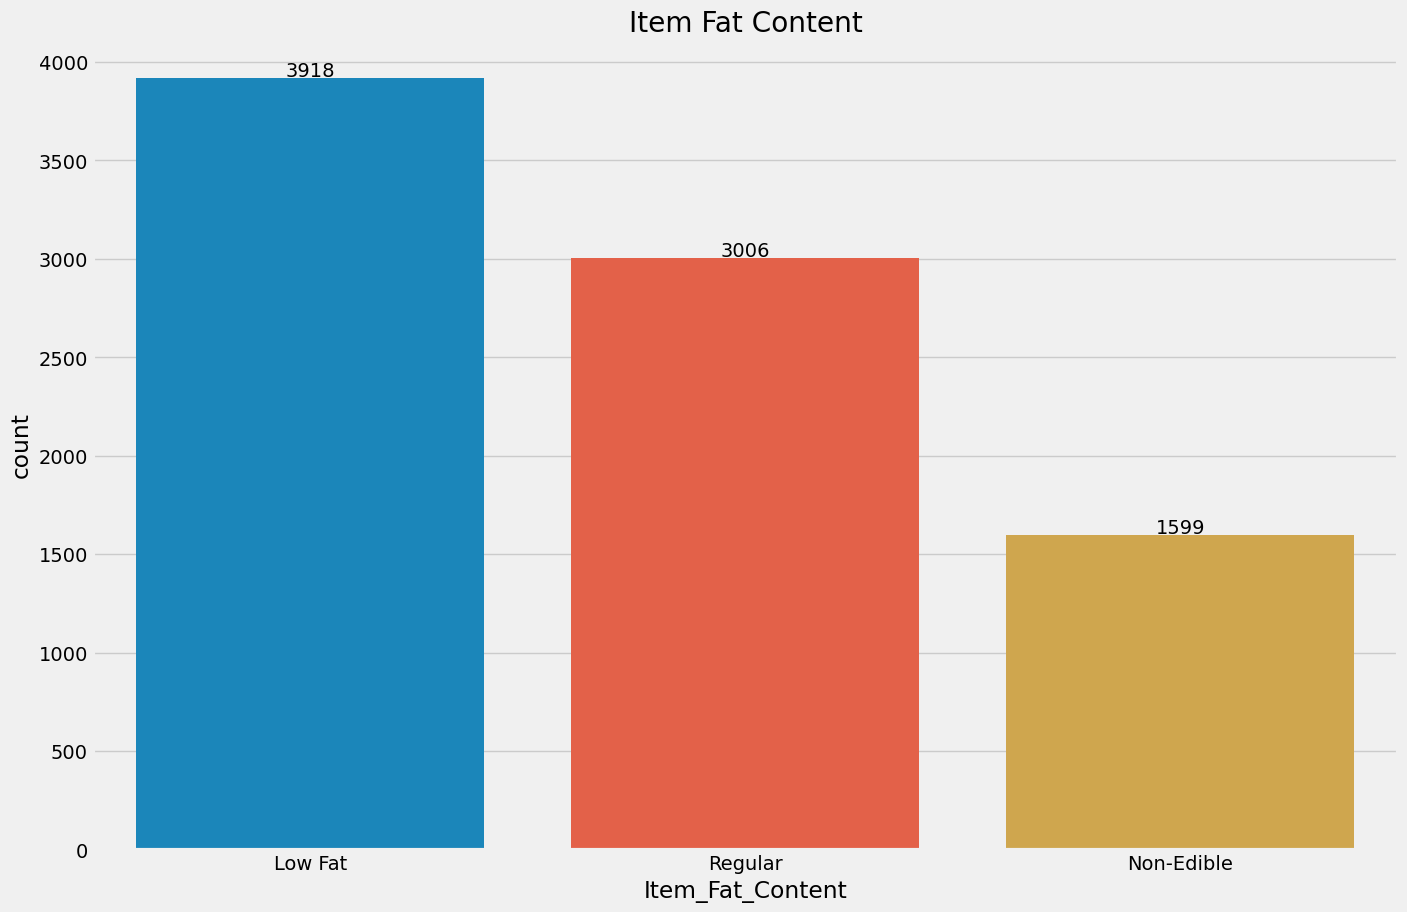

In [37]:
plt.rcParams['figure.figsize']=(15,10)
plt.style.use('fivethirtyeight')
plot = sns.countplot(x = df['Item_Fat_Content'],data = df)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2.0,p.get_height()),
                  ha='center',va='center',xytext=(0,5),textcoords='offset points')
plt.title('Item Fat Content')
plt.savefig('Item Fat Content.png')
plt.show()

**_Plotting the Bar Graph with count of `Item_Type` and confirm that there are no null values and identify all the unique values from the `Item_Type` and saving the png file_**

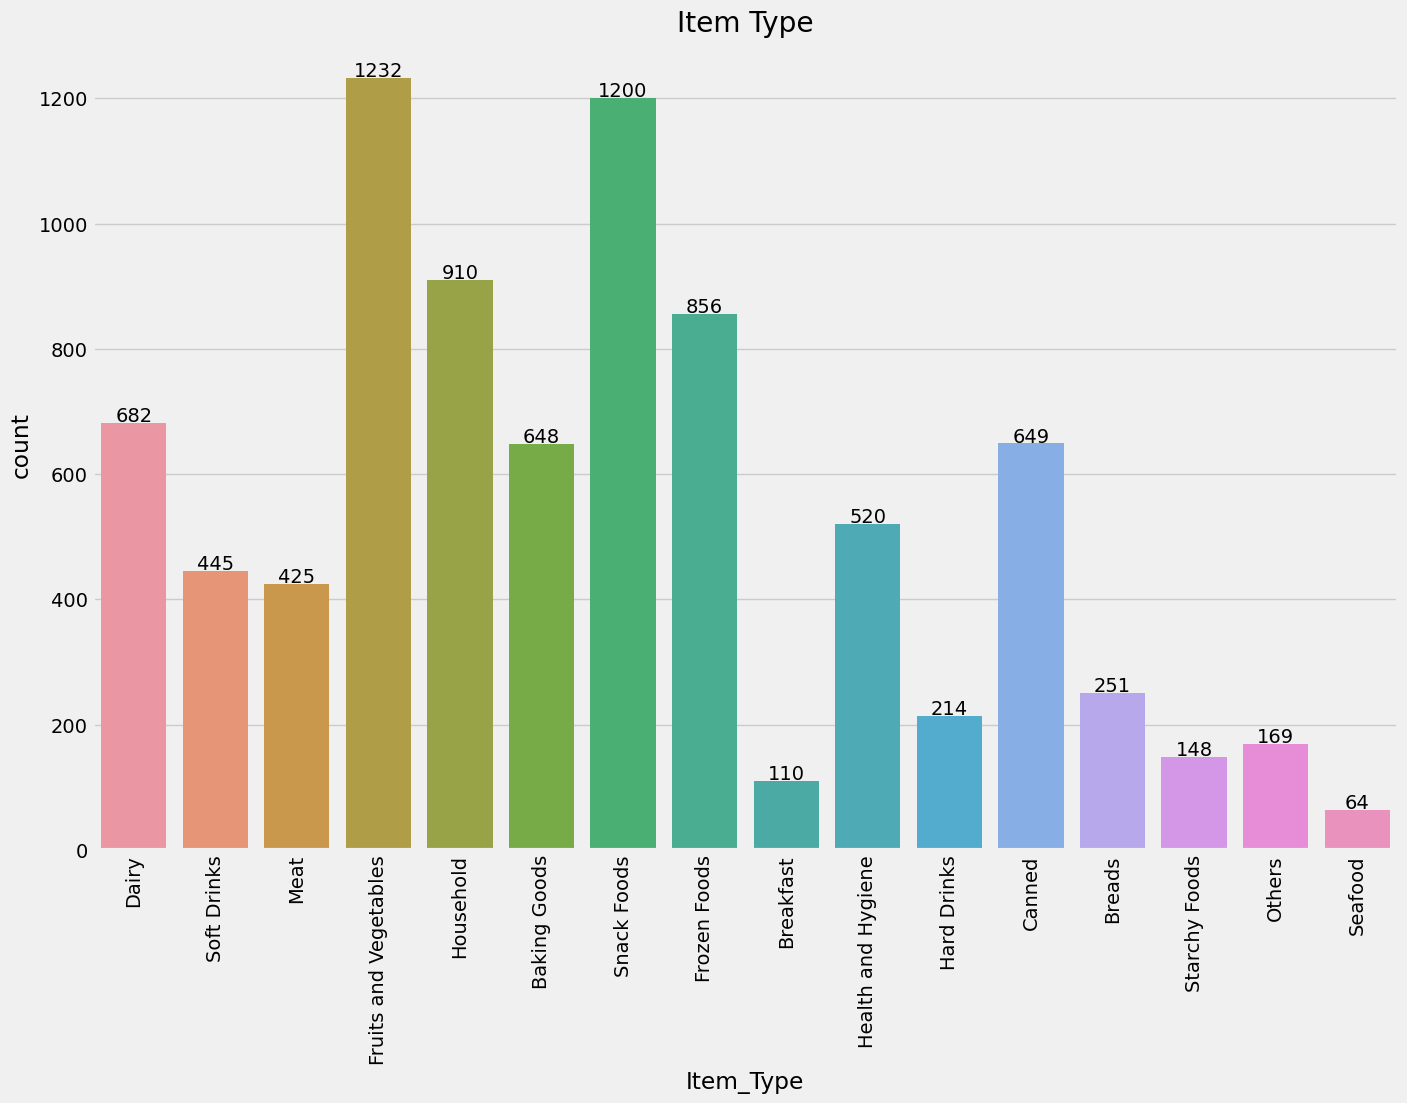

In [38]:
plot = sns.countplot(x = df['Item_Type'],data = df)
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2.0,p.get_height()),
                  ha='center',va='center',xytext=(0,5),textcoords='offset points')
plt.title('Item Type')
plt.savefig('Item Type.png')
plt.show()

**_Plotting the Bar Graph with count of `Outlet_Establishment_Year` and confirm that there are no null values and identify all the unique values from the `Outlet_Establishment_Year` and saving the png file_**

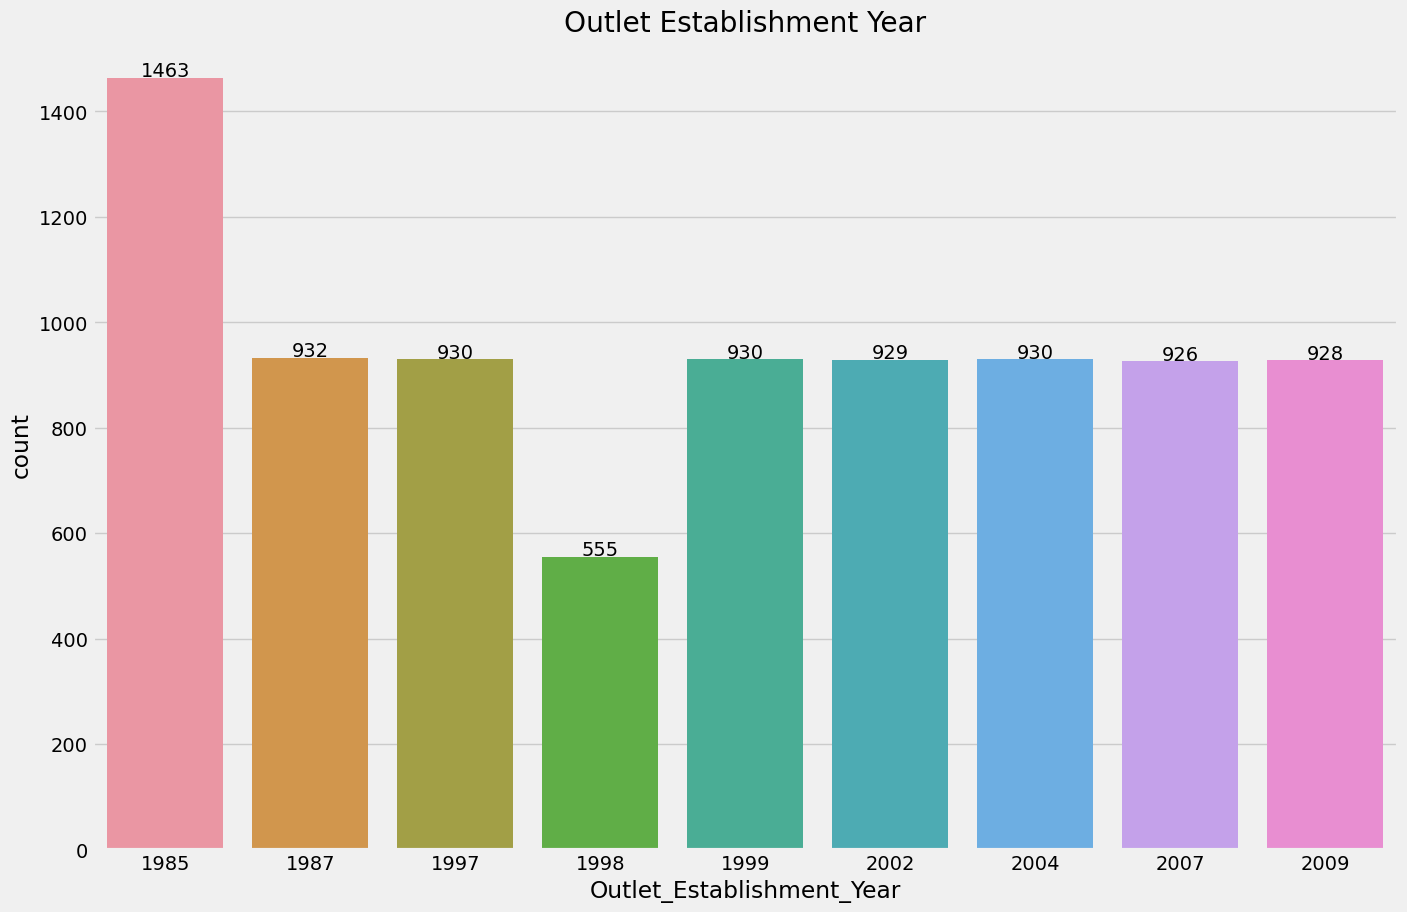

In [39]:
plot = sns.countplot(x = df['Outlet_Establishment_Year'],data = df)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2.0,p.get_height()),
                  ha='center',va='center',xytext=(0,5),textcoords='offset points')
plt.title('Outlet Establishment Year')
plt.savefig('Outlet Establishment Year.png')
plt.show()

**_Plotting the Bar Graph with count of `Outlet_Loaction_Type` and confirm that there are no null values and identify all the unique values from the `Outlet_Loaction_Type` and saving the png file_**

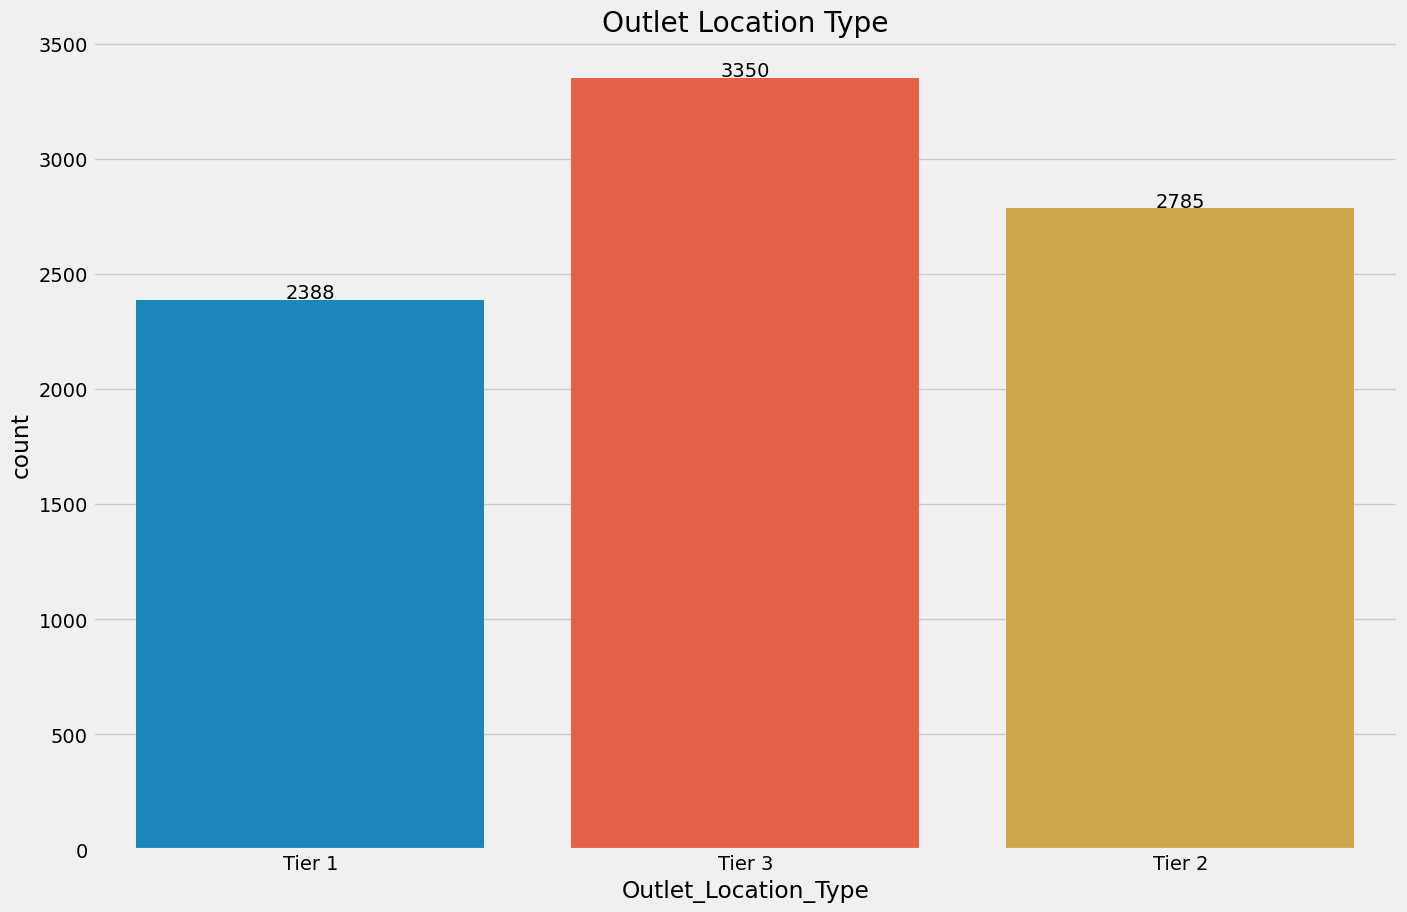

In [40]:
plot = sns.countplot(x = df['Outlet_Location_Type'],data = df)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2.0,p.get_height()),
                  ha='center',va='center',xytext=(0,5),textcoords='offset points')
plt.title('Outlet Location Type')
plt.savefig('Outlet Location Type.png')
plt.show()

**_Plotting the Bar Graph with count of `Outlet_Size` and confirm that there are no null values and identify all the unique values from the `Outlet_Size` and saving the png file_**

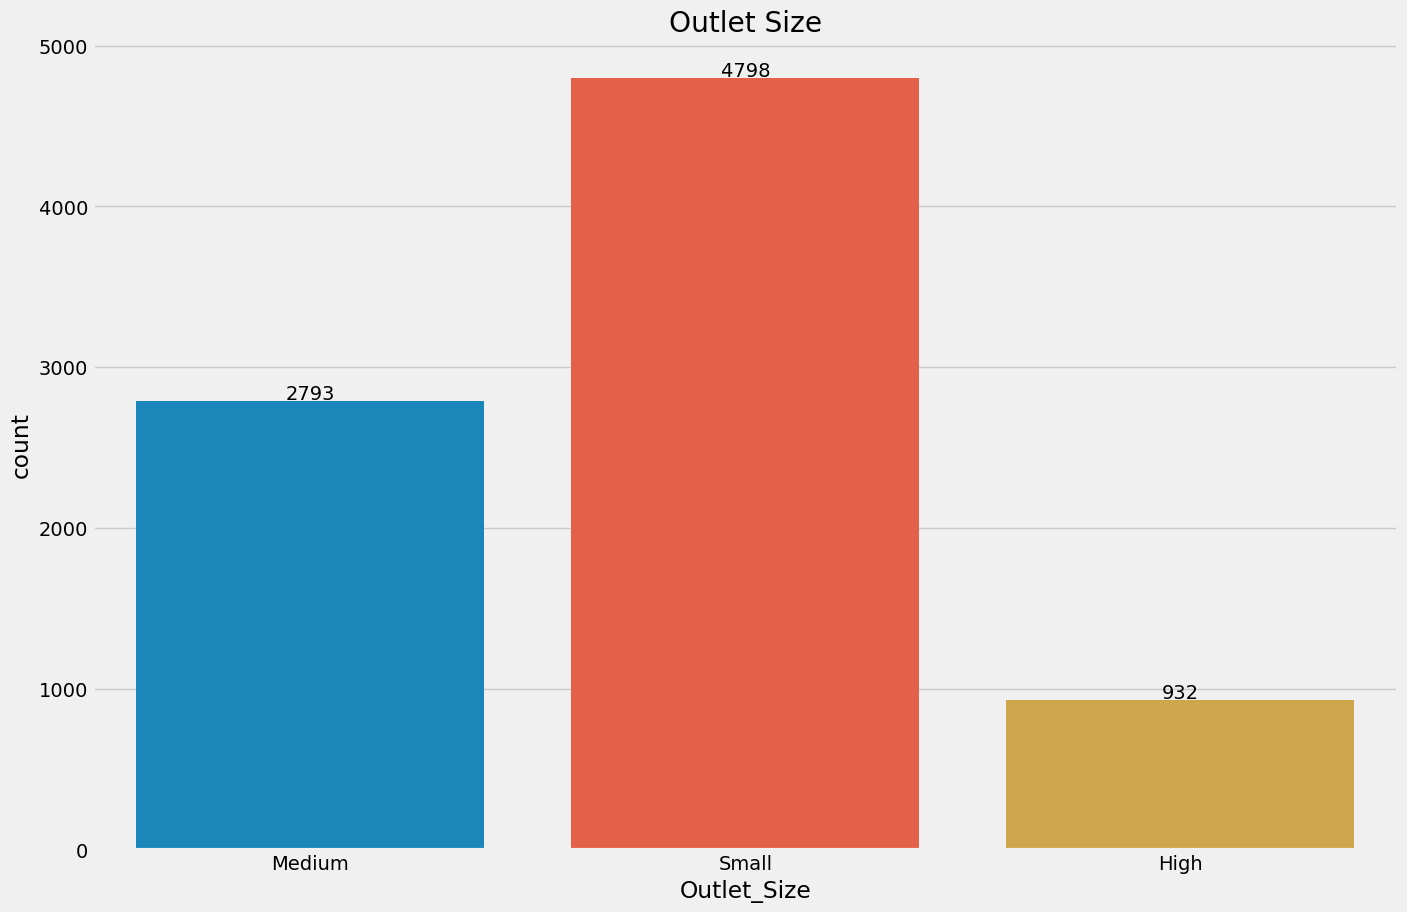

In [41]:
plot = sns.countplot(x = df['Outlet_Size'],data = df)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2.0,p.get_height()),
                  ha='center',va='center',xytext=(0,5),textcoords='offset points')
plt.title('Outlet Size')
plt.savefig('Outlet Size.png')
plt.show()

**_Plotting the Bar Graph with count of `Outlet_Type` and confirm that there are no null values and identify all the unique values from the `Outlet_Type` and saving the png file_**

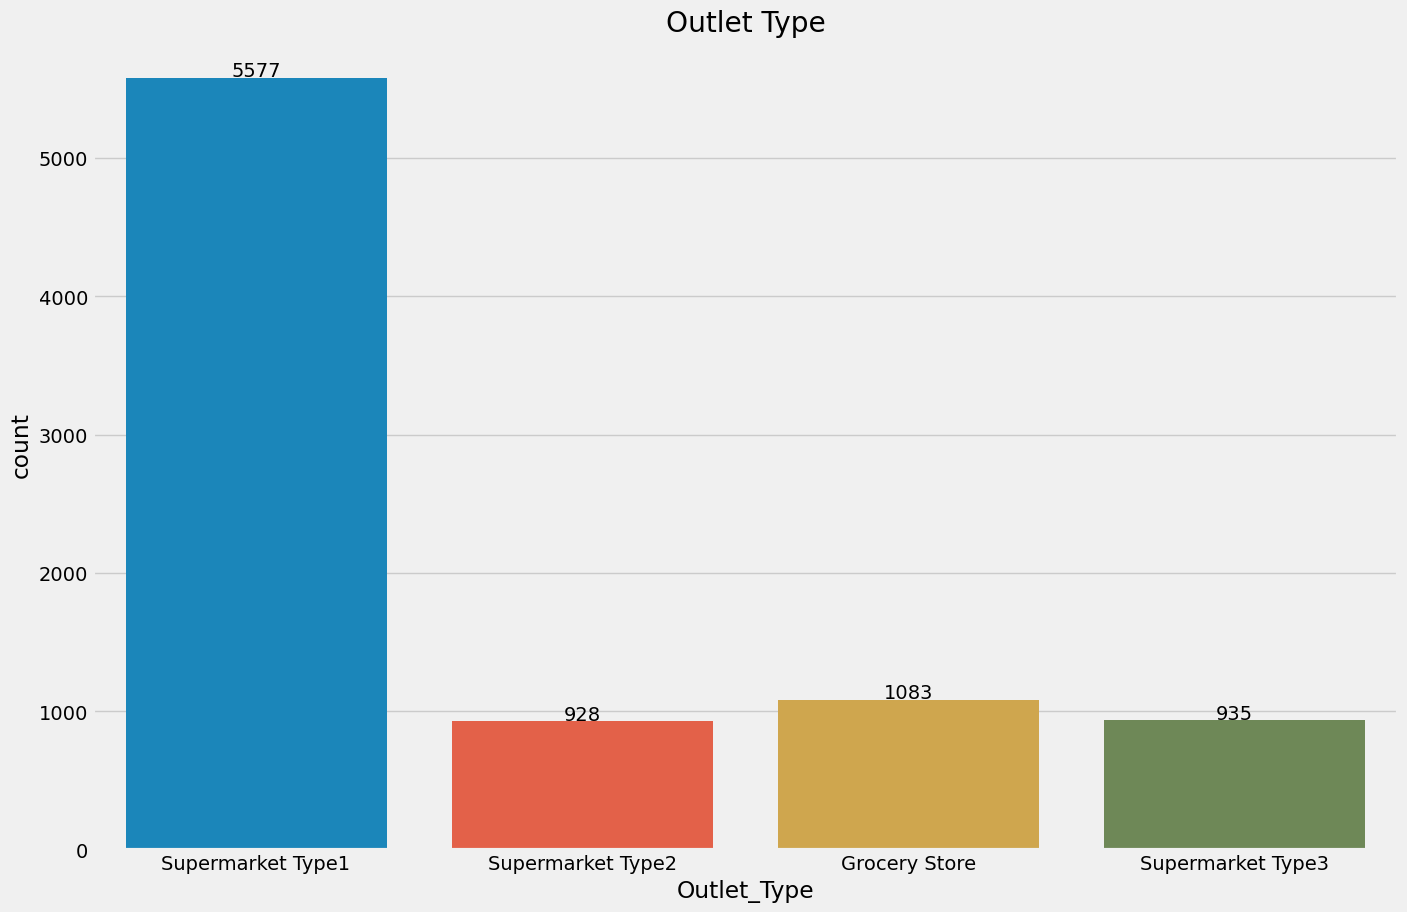

In [42]:
plot = sns.countplot(x = df['Outlet_Type'],data = df)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2.0,p.get_height()),
                  ha='center',va='center',xytext=(0,5),textcoords='offset points')
plt.title('Outlet Type')
plt.savefig('Outlet Type.png')
plt.show()

**_Visualizing the data distribution of a `Item_Weight` column against the density distribution using Seaborn Distplot and saving the PNG file_**

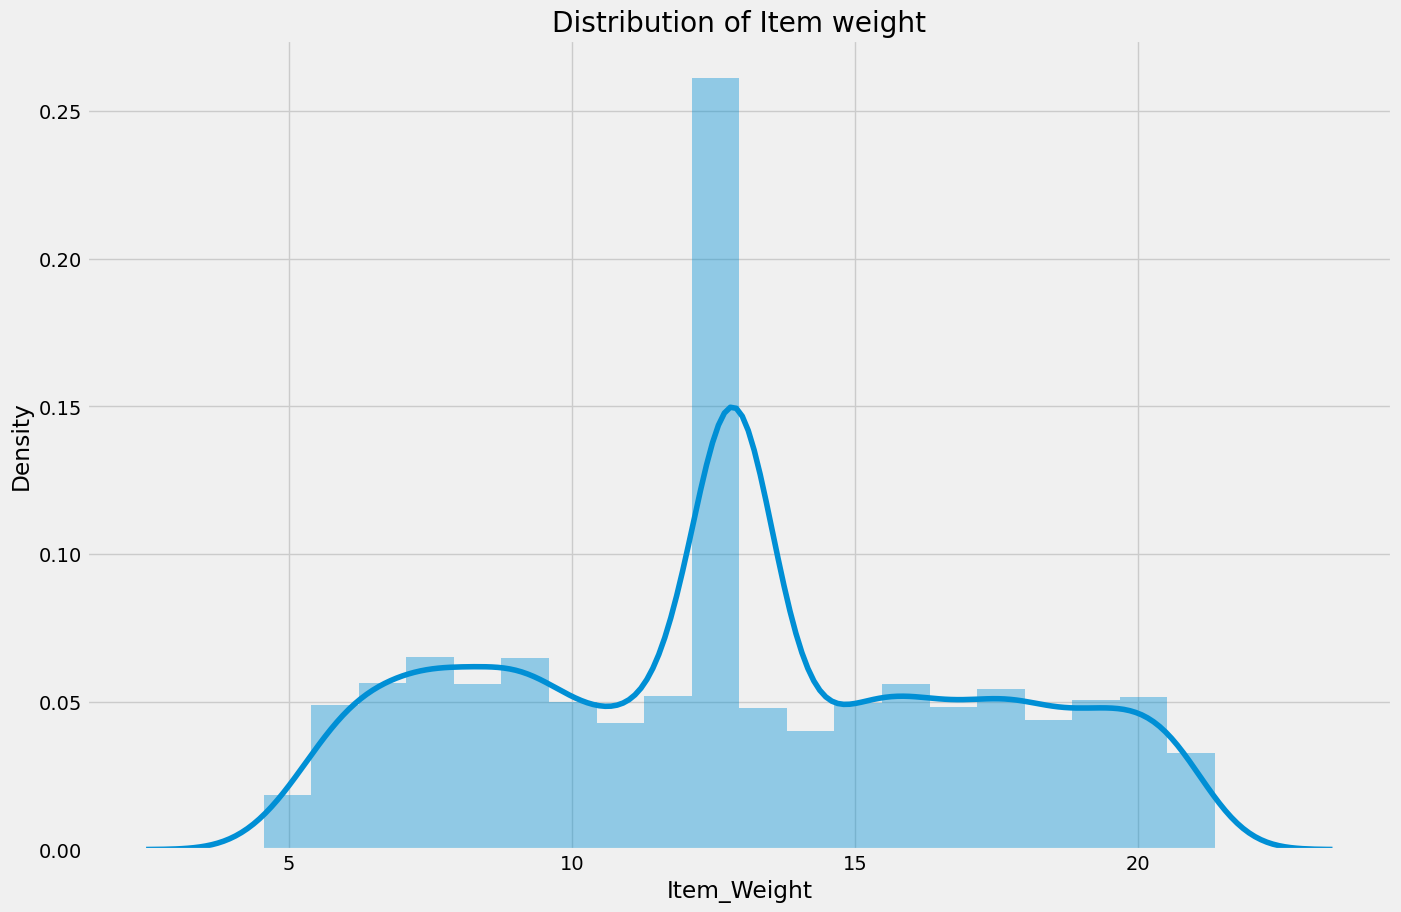

In [43]:
sns.distplot(df['Item_Weight'],bins = 20)
plt.title('Distribution of Item weight')
plt.savefig('Distribution of Item weight.png')
plt.show()

**_Getting the correlation value from all the numeric columns from the dataset using seaborn Heatmap & saving the PNG file_**

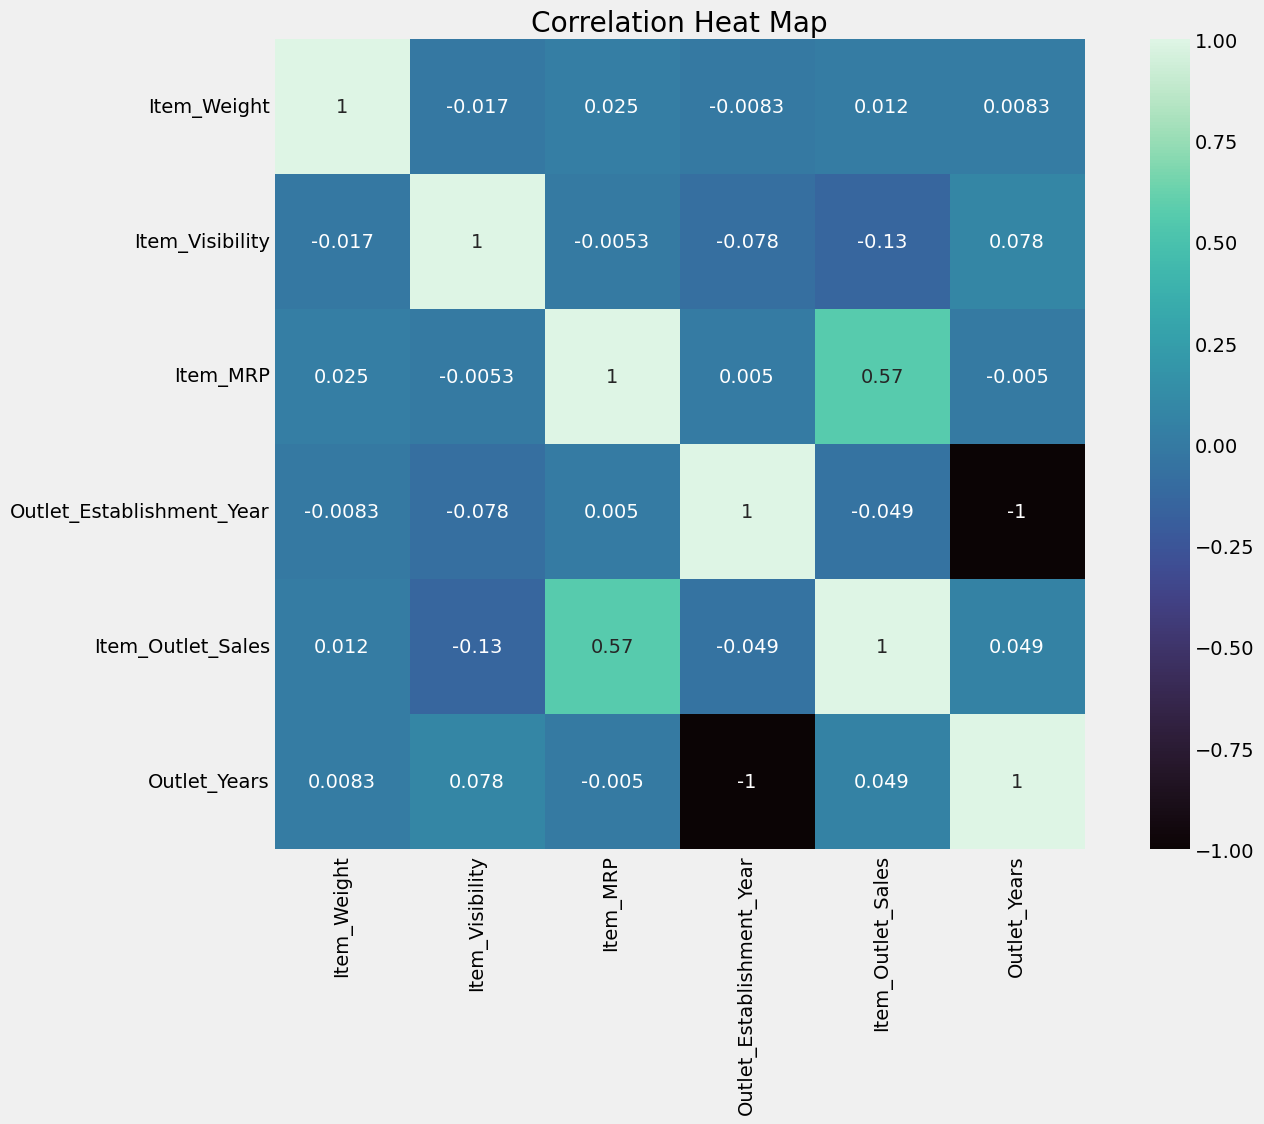

In [44]:
corr = df.corr()
sns.heatmap(corr,annot=True,cbar=True,square=True,cmap='mako')
plt.title('Correlation Heat Map')
plt.savefig('Correlation Heat Map.png')

## _Data Preprocessing_
**_Label Encoding the `Outlet_Identifier` column and adding it as a new column `Outlet` to the dataset_**

In [45]:
le = LabelEncoder()
df['Outlet']=le.fit_transform(df['Outlet_Identifier'])

**_Getting the data types of all column to find out the 'object' data types columns for preprocessing before assigning it to dependent variable and independent variable_**

In [46]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
New_Item_Type                 object
Outlet_Years                   int64
Outlet                         int32
dtype: object

**_Adding all the necessary column with "object" data types to the list and label encoding the columns._**

In [47]:
col = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for col in col:
    df[col]=le.fit_transform(df[col])

**_One Hot Encoding the columns `Item_Fat_Content`,`Outlet_Size`,`Outlet_Location_Type`,`Outlet_Type`,`New_Item_Type` using <span style='color:violet'> Get Dummies </span> Function_**

In [48]:
df = pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type'])

**_Assigning the dependent and independent variable_**

In [49]:
x = df.drop(['Item_Identifier','Outlet_Establishment_Year','Outlet_Identifier','Item_Outlet_Sales'],axis=1)
y = df['Item_Outlet_Sales']

## _Model Fitting_
**_Splitting the dependent variable and independent variable into training and test dataset using using <span style='color:violet'> Train Test Split </span>_**

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

**_Defining the function for the ML algorithm and fitting it with the passing dependent and independent variable, predicting the dependent variable using algorithm with independent variable. with using <span style='color:violet'> Cross Val Score [Cross Validation] </span> process getting the model report with cv using "neg_mean_squared_error" as scoring and also getting the absolute average mean of cv. After that using <span style='color:violet'> Cross Val Score [Cross Validation] </span> process, getting the cv_score as R2 score using default scoring parameters and also again getting the mean value of cv_score with default scoring as Average R2 score. End of the function the accuracy for full data is actually determined using actual R2 score founded between the dependent variable and predicted dependent variable. Atlast getting the coefficient of algorithm with all the columns and Plotting the graph using coefficient value of algorithm to show the impact of each columns_**

In [51]:
def FitModel(model,x,y):
    model.fit(x,y)
    pred = model.predict(x)
    cv = cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=10)
    print('Model Report')
    print('\nScoring - neg_mean_squared_error')
    print(cv)
    cv = np.abs(np.mean(cv))
    print('\nAbsolute Avg of - neg_mean_squared_error: ',cv,'\n')
    cv_score = cross_val_score(model,x,y,cv=10)
    print('\nR2 Score')
    print(cv_score)
    cv_score = np.mean(cv_score)
    print('\nAverage of R2 Score:',cv_score)
    print()
    print('Accuracy for full data')
    print('\nR2 Score: ',(r2_score(y,pred)))
    print()
    coef = pd.Series(model.coef_,x.columns).sort_values()
    print(coef)
    coef.plot(kind = 'bar',title='Model Coefficients')
    plt.show()

**_Fitting the <span style='color:violet'> Linear Regression </span> algorithm to the model and passing it to the defined function with train dependent and train independent variable and getting the output for the defined function_**

Model Report

Scoring - neg_mean_squared_error
[-1308363.54107399 -1317107.74968154 -1282783.25673252 -1368462.77992118
 -1195693.21293122 -1314995.99930038 -1224984.24333567 -1371452.26391224
 -1138875.63213369 -1309200.11182761]

Absolute Avg of - neg_mean_squared_error:  1283191.8790850055 


R2 Score
[0.54291572 0.54630942 0.57753376 0.57653483 0.62639187 0.51661562
 0.57357095 0.50602569 0.57904273 0.52933781]

Average of R2 Score: 0.5574278397578534

Accuracy for full data

R2 Score:  0.5625380588222987

Outlet_Type_1            -1545.096518
Outlet_Size_1            -1143.870920
Outlet_Location_Type_2    -910.945639
Outlet_Type_2             -883.280776
Outlet_Size_2             -671.685443
Outlet_Type_0             -536.493175
Item_Visibility           -192.479994
Outlet_Years              -188.339775
New_Item_Type_0            -31.688628
New_Item_Type_2            -23.894275
Item_Fat_Content_1         -23.894275
Item_Type                    0.020929
Item_Weight                 

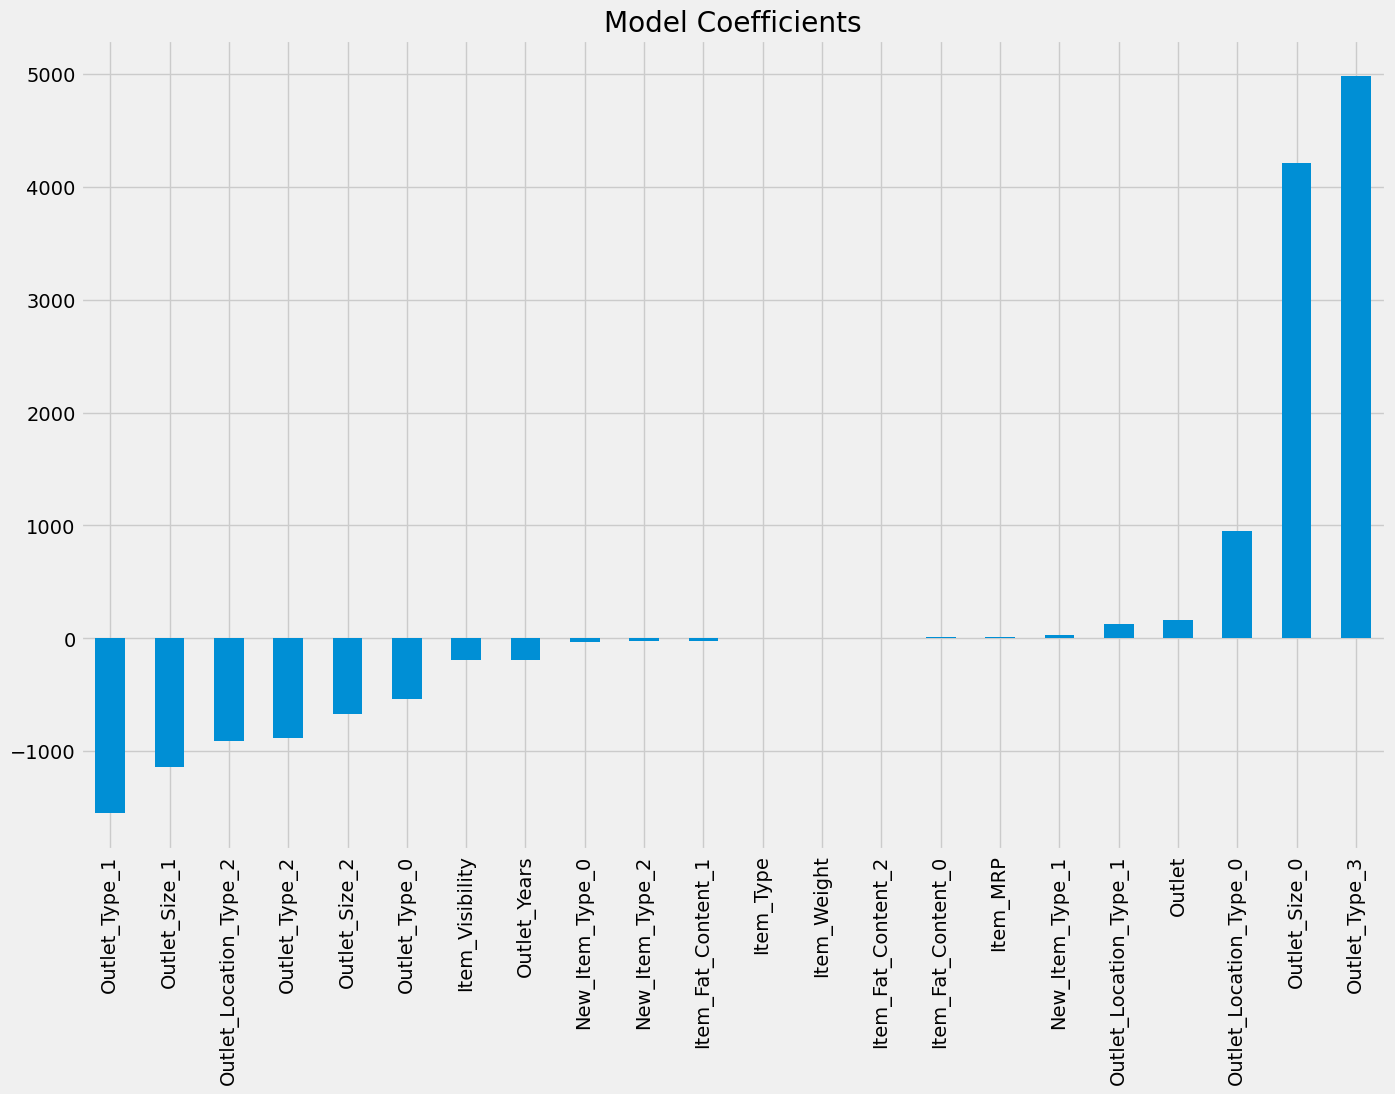

In [52]:
LR = LinearRegression(normalize=True)
FitModel(LR,x_train,y_train)

**_Fitting the <span style='color:violet'> Lasso </span> algorithm to the model and passing it to the defined function with train dependent and train independent variable and getting the output for the defined function_**

Model Report

Scoring - neg_mean_squared_error
[-1302218.36653497 -1332170.89643348 -1294820.35958161 -1413201.58434458
 -1245573.13435591 -1302305.8412564  -1256224.54154128 -1381979.27138655
 -1150748.76766032 -1331497.70024599]

Absolute Avg of - neg_mean_squared_error:  1301074.046334107 


R2 Score
[0.54506257 0.54112077 0.57356951 0.56269059 0.61080631 0.52128045
 0.56269589 0.50223404 0.57465412 0.52132175]

Average of R2 Score: 0.5515435999738486

Accuracy for full data

R2 Score:  0.5530471652098432

Outlet_Type_0            -1734.758186
Item_Weight                  0.000000
New_Item_Type_0             -0.000000
Outlet_Type_2               -0.000000
Outlet_Type_1                0.000000
Outlet_Location_Type_2      -0.000000
Outlet_Location_Type_1       0.000000
Outlet_Location_Type_0      -0.000000
Outlet_Size_2               -0.000000
New_Item_Type_1              0.000000
Outlet_Size_1                0.000000
Item_Fat_Content_2           0.000000
Item_Fat_Content_1          -

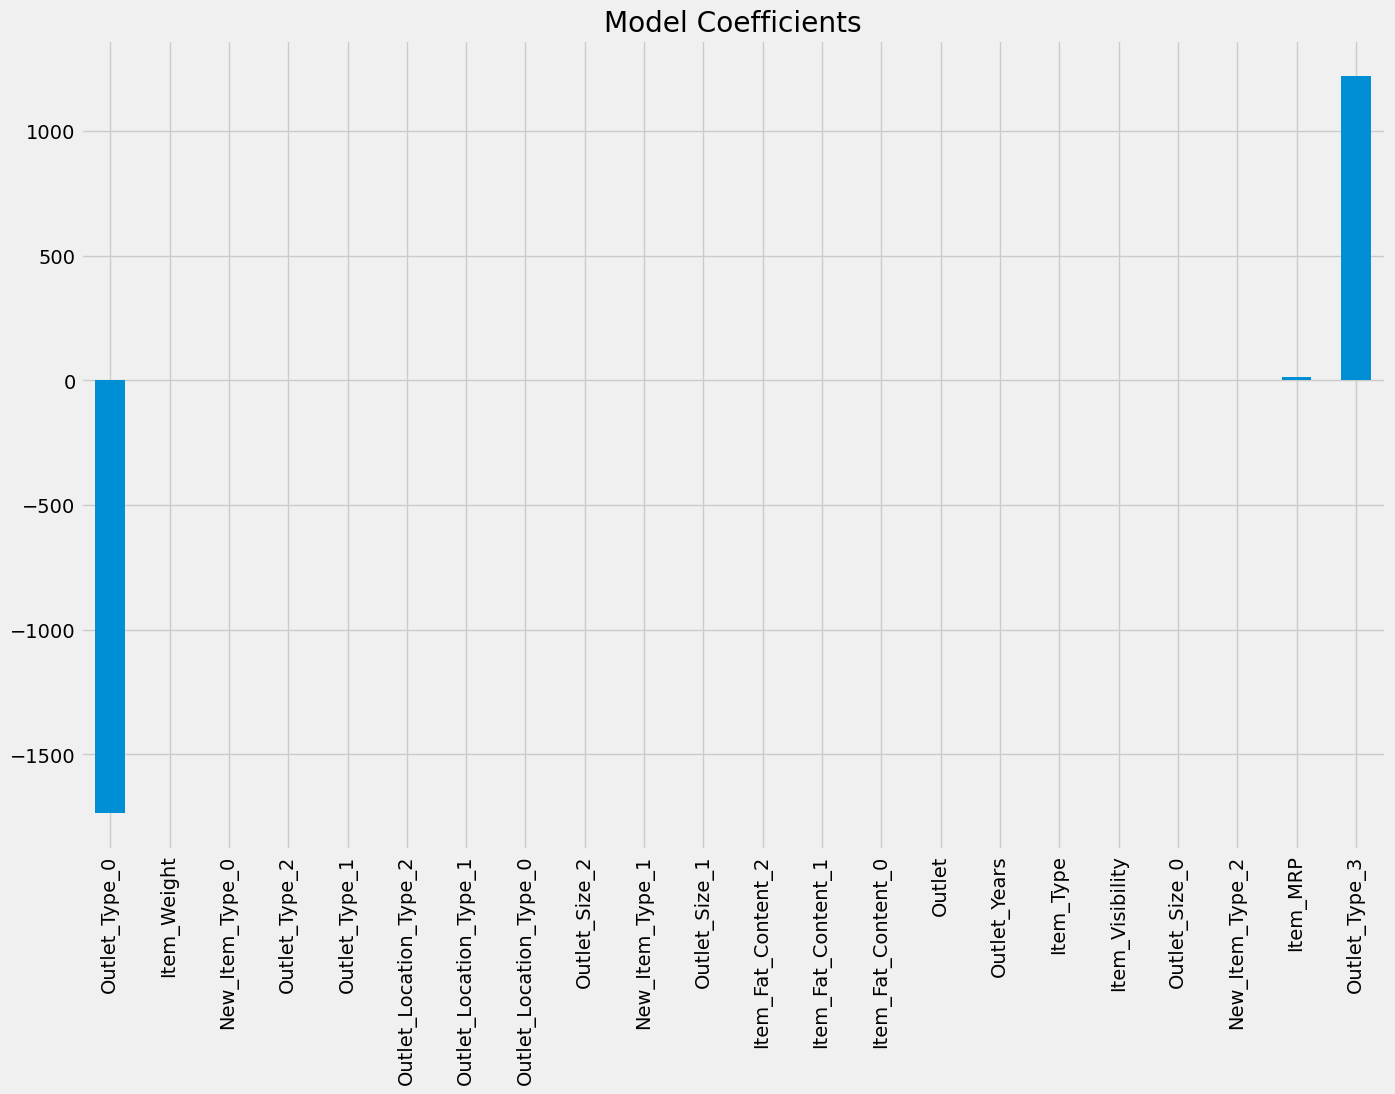

In [53]:
La = Lasso(normalize=True)
FitModel(La,x_train,y_train)

**_Fitting the <span style='color:violet'> Ridge </span> algorithm to the model and passing it to the defined function with train dependent and train independent variable and getting the output for the defined function_**

Model Report

Scoring - neg_mean_squared_error
[-1634366.79435002 -1659312.01248731 -1635399.05212848 -1831459.60361034
 -1710244.25782122 -1541858.82626585 -1578752.10468889 -1639627.12413278
 -1438709.56572747 -1635590.66754369]

Absolute Avg of - neg_mean_squared_error:  1630532.0008756046 


R2 Score
[0.42902462 0.42843383 0.46140481 0.43326237 0.46561446 0.43322225
 0.45042088 0.40943356 0.46821652 0.41199922]

Average of R2 Score: 0.4391032527776444

Accuracy for full data

R2 Score:  0.44155600704166786

Item_Visibility          -993.202665
Outlet_Type_0            -794.162625
Outlet_Location_Type_0   -174.734308
Outlet_Size_2            -163.930878
Outlet_Type_2            -124.821603
New_Item_Type_0           -52.378570
Item_Fat_Content_1        -19.838513
New_Item_Type_2           -19.838513
Item_Weight                 2.278801
Item_Type                   2.352996
Outlet_Years                3.662567
Item_Fat_Content_0          4.397866
Outlet_Size_0               6.191463
It

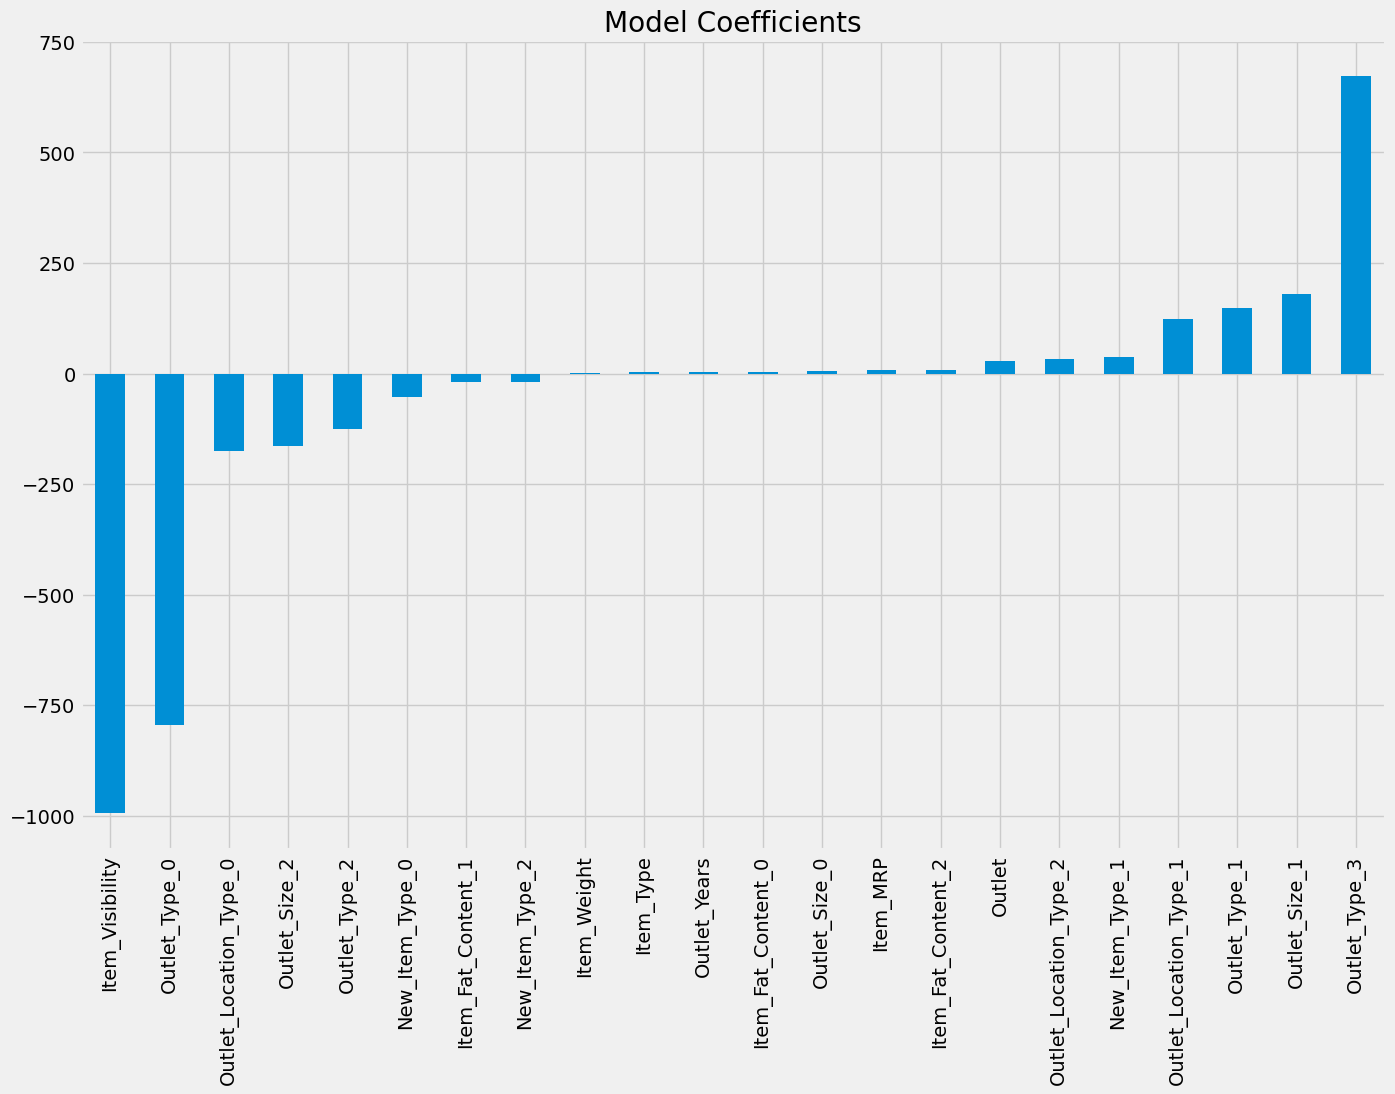

In [54]:
Re = Ridge(normalize=True)
FitModel(Re,x_train,y_train)

**_Defining the function for the ML algorithm and fitting it with the passing dependent and independent variable, predicting the dependent variable using algorithm with independent variable. with using <span style='color:violet'> Cross Val Score [Cross Validation] </span> process getting the model report with cv using "neg_mean_squared_error" as scoring and also getting the absolute average mean of cv. After that using <span style='color:violet'> Cross Val Score [Cross Validation] </span> process, getting the cv_score as R2 score using default scoring parameters and also again getting the mean value of cv_score with default scoring as Average R2 score. End of the function the accuracy for full data is actually determined using actual R2 score founded between the dependent variable and predicted dependent variable. Atlast getting the feature importance of algorithm with all the columns and Plotting the graph using feature importance of algorithm to show the impact of each columns_**

In [55]:
def FitModel(model,x,y):
    model.fit(x,y)
    pred = model.predict(x)
    cv = cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=10)
    print('Model Report')
    print('\nScoring - neg_mean_squared_error')
    print(cv)
    cv = np.abs(np.mean(cv))
    print('\nAbsolute Avg of - neg_mean_squared_error: ',cv,'\n')
    cv_score = cross_val_score(model,x,y,cv=10)
    print('\nR2 Score')
    print(cv_score)
    cv_score = np.mean(cv_score)
    print('\nAverage of R2 Score:',cv_score)
    print()
    print('Accuracy for full data')
    print('\nR2 Score: ',(r2_score(y,pred)))
    print()
    Feature_Importance= pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
    print(Feature_Importance)
    Feature_Importance.plot(kind = 'bar',title='Feature Importance')
    plt.show()

**_Fitting the <span style='color:violet'> Decision Tree Regressor </span> algorithm to the model and passing it to the defined function with train dependent and train independent variable and getting the output for the defined function_**

Model Report

Scoring - neg_mean_squared_error
[-2630640.55083729 -2459859.23633087 -2508670.97164181 -2195954.48630603
 -2390820.45314673 -2668157.91806123 -2433583.6122544  -2277472.6009741
 -2088797.59521646 -2324466.47130354]

Absolute Avg of - neg_mean_squared_error:  2397842.3896072474 


R2 Score
[0.1449863  0.15760096 0.19988973 0.30913527 0.26664015 0.02477616
 0.17502025 0.15424711 0.24192034 0.1564826 ]

Average of R2 Score: 0.18306988814035002

Accuracy for full data

R2 Score:  1.0

Item_MRP                  0.438501
Outlet_Type_0             0.204179
Item_Visibility           0.108551
Outlet_Type_3             0.076183
Item_Weight               0.046542
Item_Type                 0.038600
Outlet_Years              0.019527
Outlet                    0.016040
Item_Fat_Content_0        0.008558
Outlet_Size_2             0.006203
New_Item_Type_1           0.005767
Item_Fat_Content_2        0.005741
Outlet_Location_Type_1    0.005210
Outlet_Size_1             0.003927
Outlet_Lo

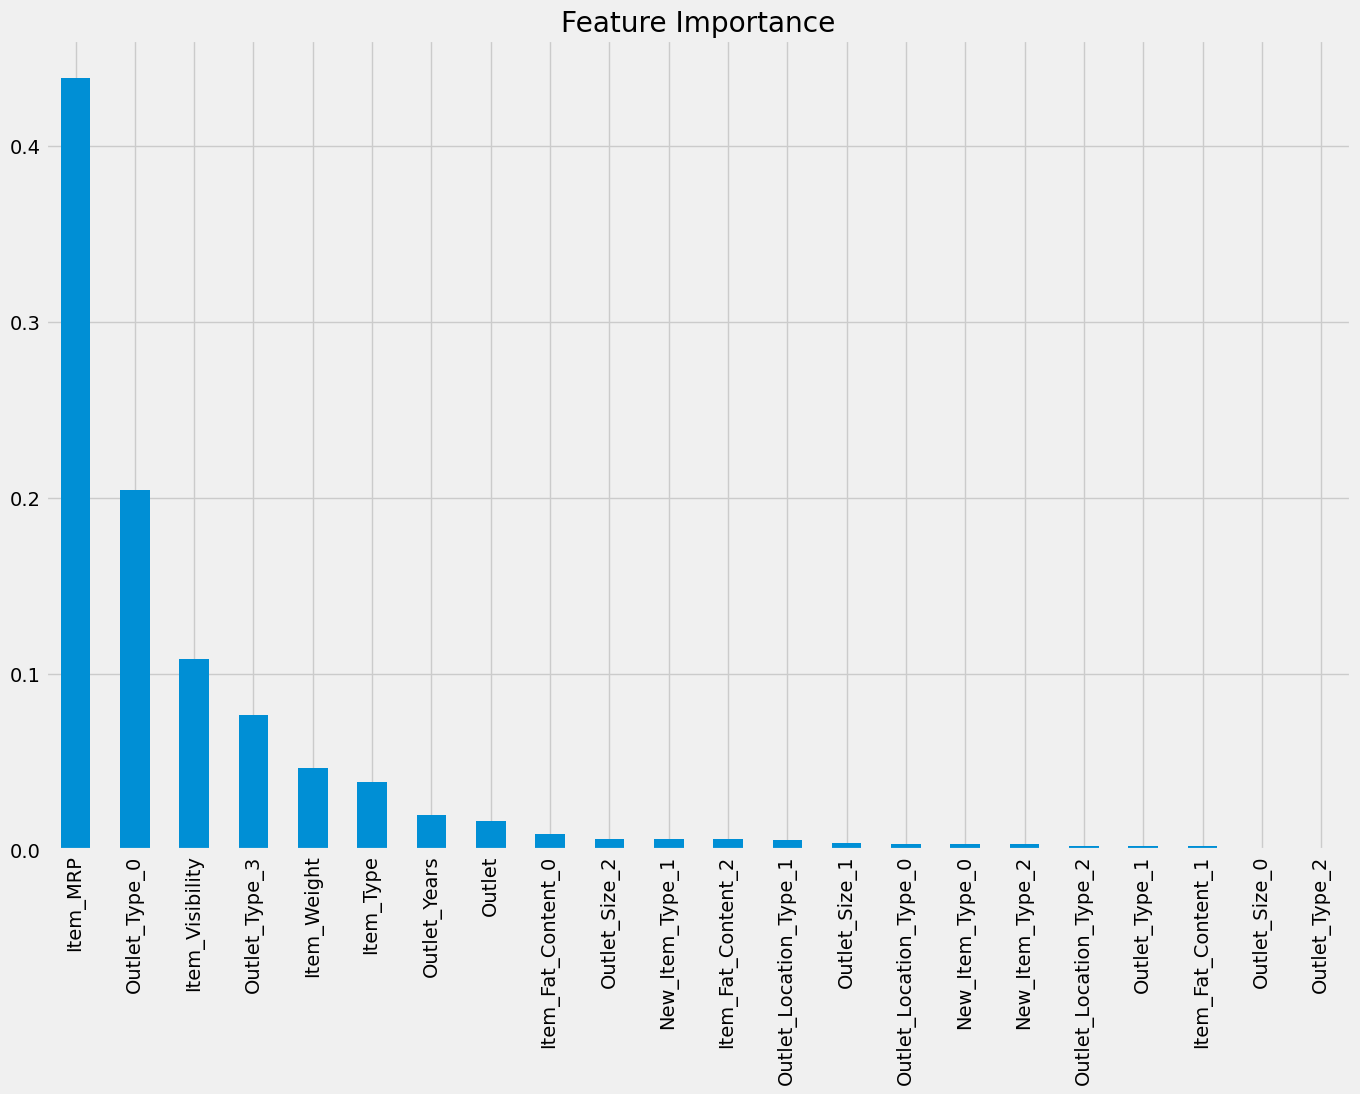

In [56]:
DT = DecisionTreeRegressor()
FitModel(DT,x_train,y_train)

**_Fitting the <span style='color:violet'> Random Forest Regressor </span> algorithm to the model and passing it to the defined function with train dependent and train independent variable and getting the output for the defined function_**

Model Report

Scoring - neg_mean_squared_error
[-1267921.93919292 -1343578.35472729 -1273831.26105079 -1361525.25683015
 -1241033.49885428 -1445195.10654241 -1192109.18784939 -1436953.20780044
 -1097781.71068114 -1378767.16875367]

Absolute Avg of - neg_mean_squared_error:  1303869.6692282488 


R2 Score
[0.55720761 0.54458417 0.58716638 0.57478324 0.61574488 0.47108918
 0.58219789 0.47125749 0.58837015 0.49345298]

Average of R2 Score: 0.5485853973161374

Accuracy for full data

R2 Score:  0.938348536905459

Item_MRP                  0.445988
Outlet_Type_0             0.199756
Item_Visibility           0.103083
Outlet_Years              0.055262
Item_Weight               0.055018
Item_Type                 0.040451
Outlet_Type_3             0.036266
Outlet                    0.016401
Item_Fat_Content_0        0.007344
Item_Fat_Content_2        0.006136
New_Item_Type_1           0.004724
Outlet_Location_Type_1    0.004498
New_Item_Type_0           0.003934
Outlet_Size_2             0.00

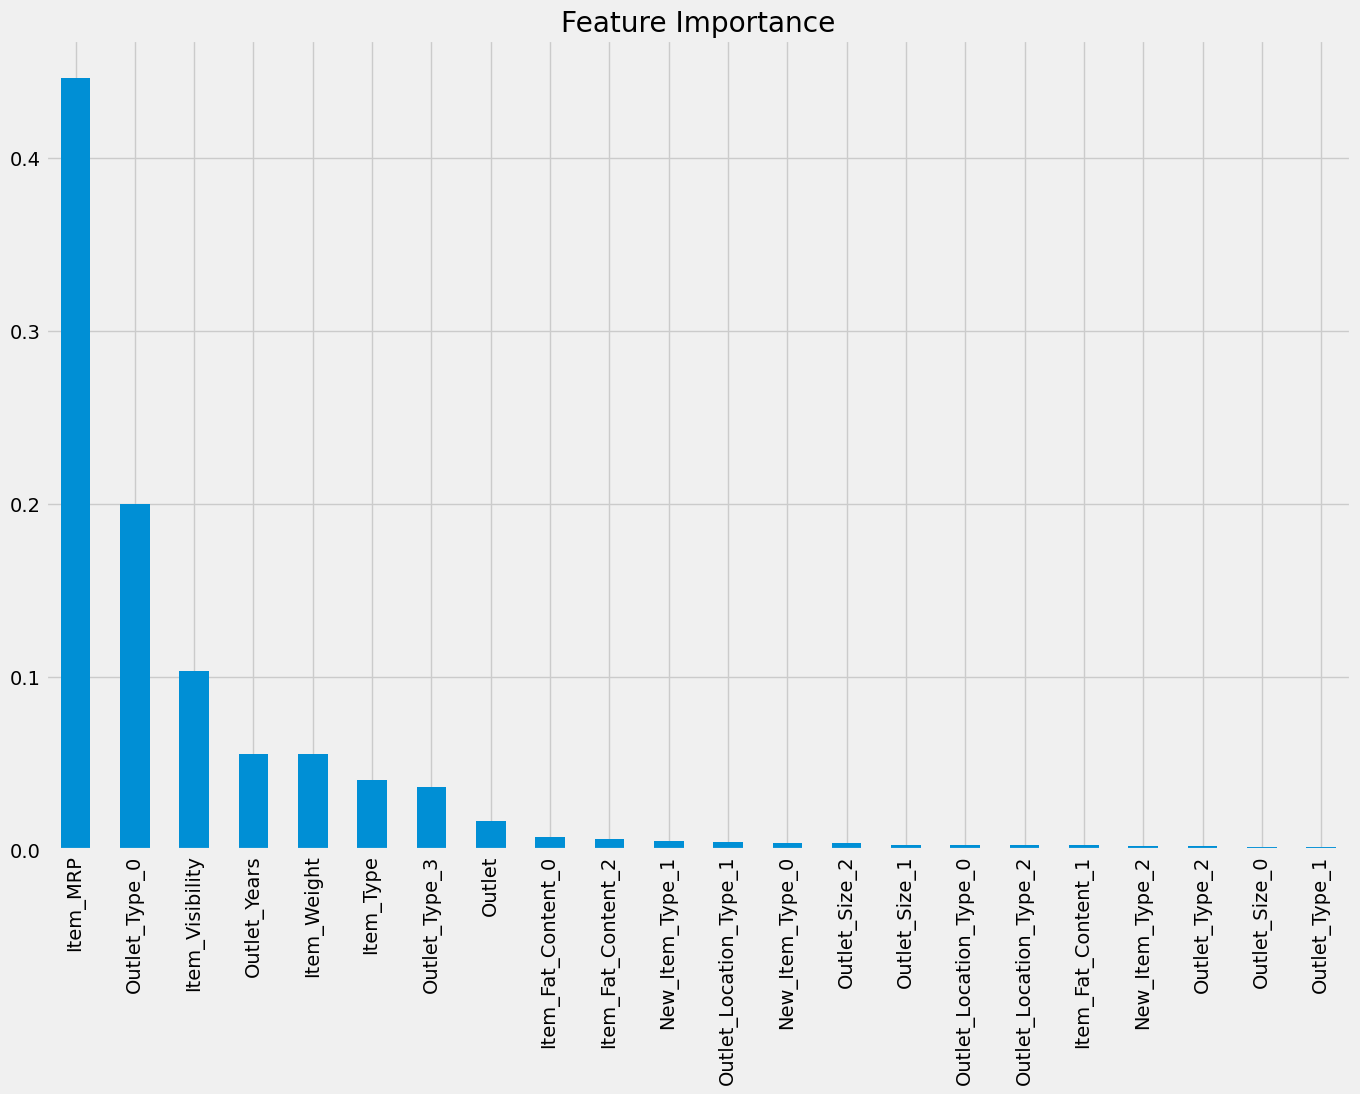

In [57]:
RF = RandomForestRegressor()
FitModel(RF,x_train,y_train)

**_Fitting the <span style='color:violet'> Extra Trees Regressor </span> algorithm to the model and passing it to the defined function with train dependent and train independent variable and getting the output for the defined function_**

Model Report

Scoring - neg_mean_squared_error
[-1371487.3774178  -1415039.05580779 -1422400.59497427 -1434956.06735334
 -1336220.57814128 -1508745.33891512 -1243917.62390664 -1529340.73688193
 -1185187.52836343 -1421534.3136957 ]

Absolute Avg of - neg_mean_squared_error:  1386882.9215457288 


R2 Score
[0.50844354 0.52240796 0.52996273 0.55196901 0.59020439 0.42518903
 0.56478331 0.44476373 0.5607068  0.48875106]

Average of R2 Score: 0.518718155854256

Accuracy for full data

R2 Score:  0.999999699970181

Item_MRP                  0.439152
Outlet_Type_0             0.179889
Item_Visibility           0.084267
Outlet_Type_3             0.071150
Item_Type                 0.056963
Item_Weight               0.055694
Outlet_Years              0.019619
Outlet                    0.017184
Item_Fat_Content_0        0.011234
Item_Fat_Content_2        0.011132
New_Item_Type_1           0.007656
New_Item_Type_0           0.006506
Outlet_Location_Type_1    0.005807
Outlet_Size_2             0.005

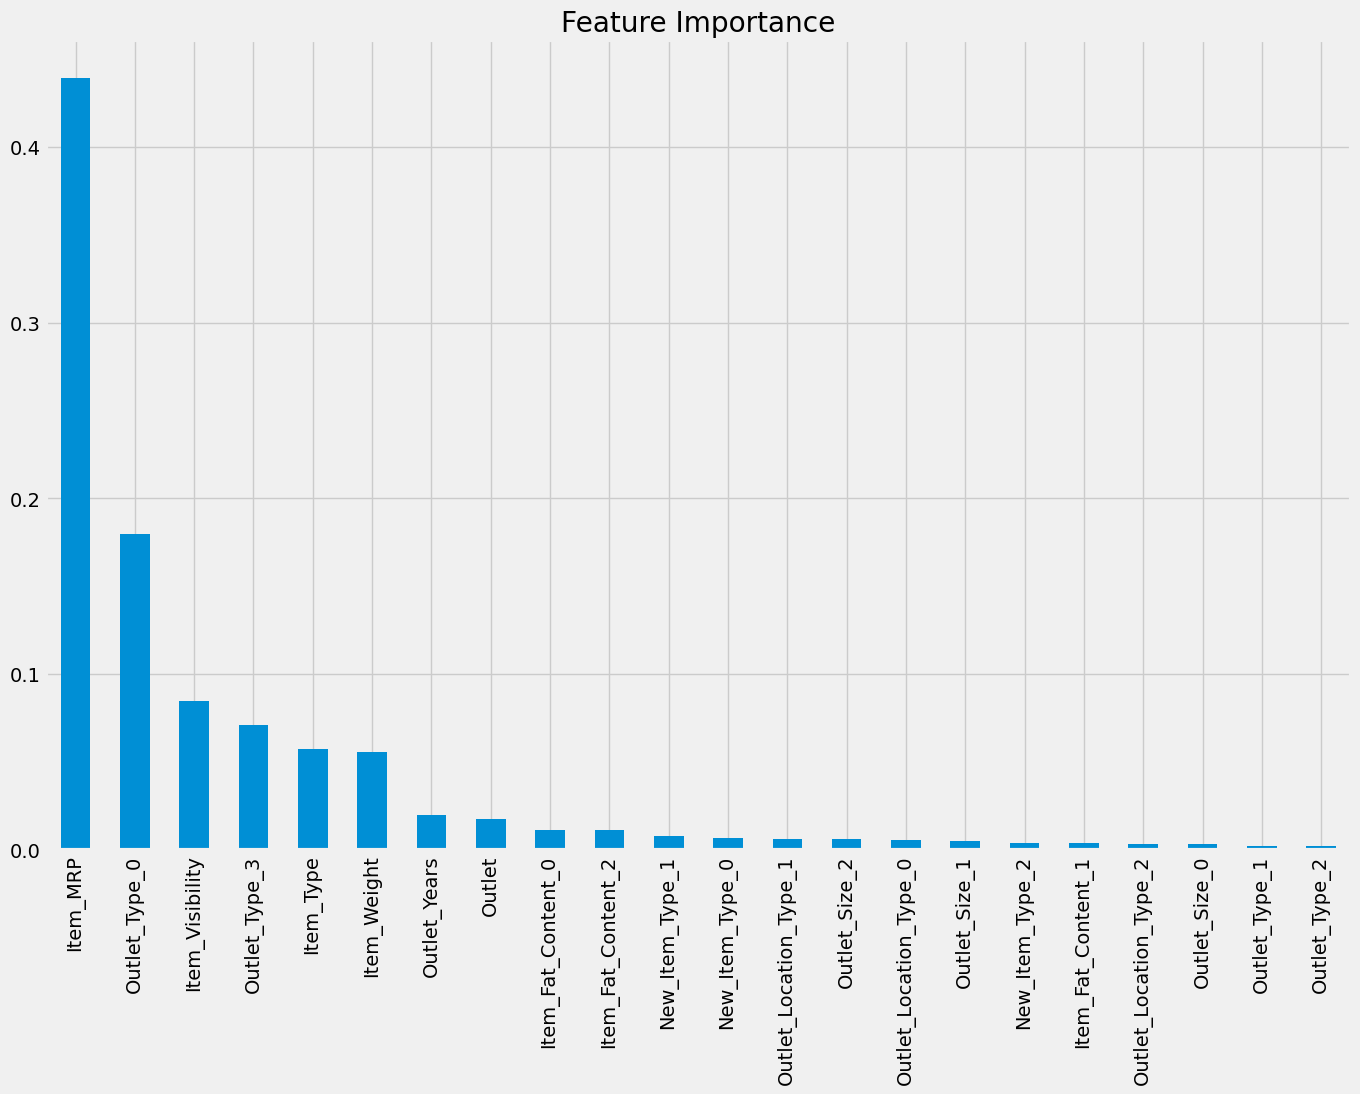

In [58]:
ET = ExtraTreesRegressor()
FitModel(ET,x_train,y_train)

**_Fitting the <span style='color:violet'> LGBM Regressor </span> algorithm to the model and passing it to the defined function with train dependent and train independent variable and getting the output for the defined function_**

Model Report

Scoring - neg_mean_squared_error
[-1225021.83167154 -1240413.23365474 -1244228.12250563 -1283278.55009791
 -1149795.48776179 -1368829.19888885 -1154552.08706992 -1353333.29913505
 -1061644.98310814 -1351233.56181511]

Absolute Avg of - neg_mean_squared_error:  1243233.0355708674 


R2 Score
[0.57203162 0.57272759 0.59023134 0.60289474 0.64073314 0.49682687
 0.59808907 0.51255184 0.60758914 0.51422663]

Average of R2 Score: 0.5707901985310498

Accuracy for full data

R2 Score:  0.742360050431971

Item_MRP                  938
Item_Visibility           694
Item_Weight               519
Item_Type                 227
Outlet_Years              203
Outlet                    136
Outlet_Type_0              72
Item_Fat_Content_0         43
Outlet_Size_2              29
Outlet_Location_Type_1     21
Item_Fat_Content_2         20
Item_Fat_Content_1         15
Outlet_Type_1              15
New_Item_Type_1            15
Outlet_Size_1              12
Outlet_Location_Type_2     12
Outle

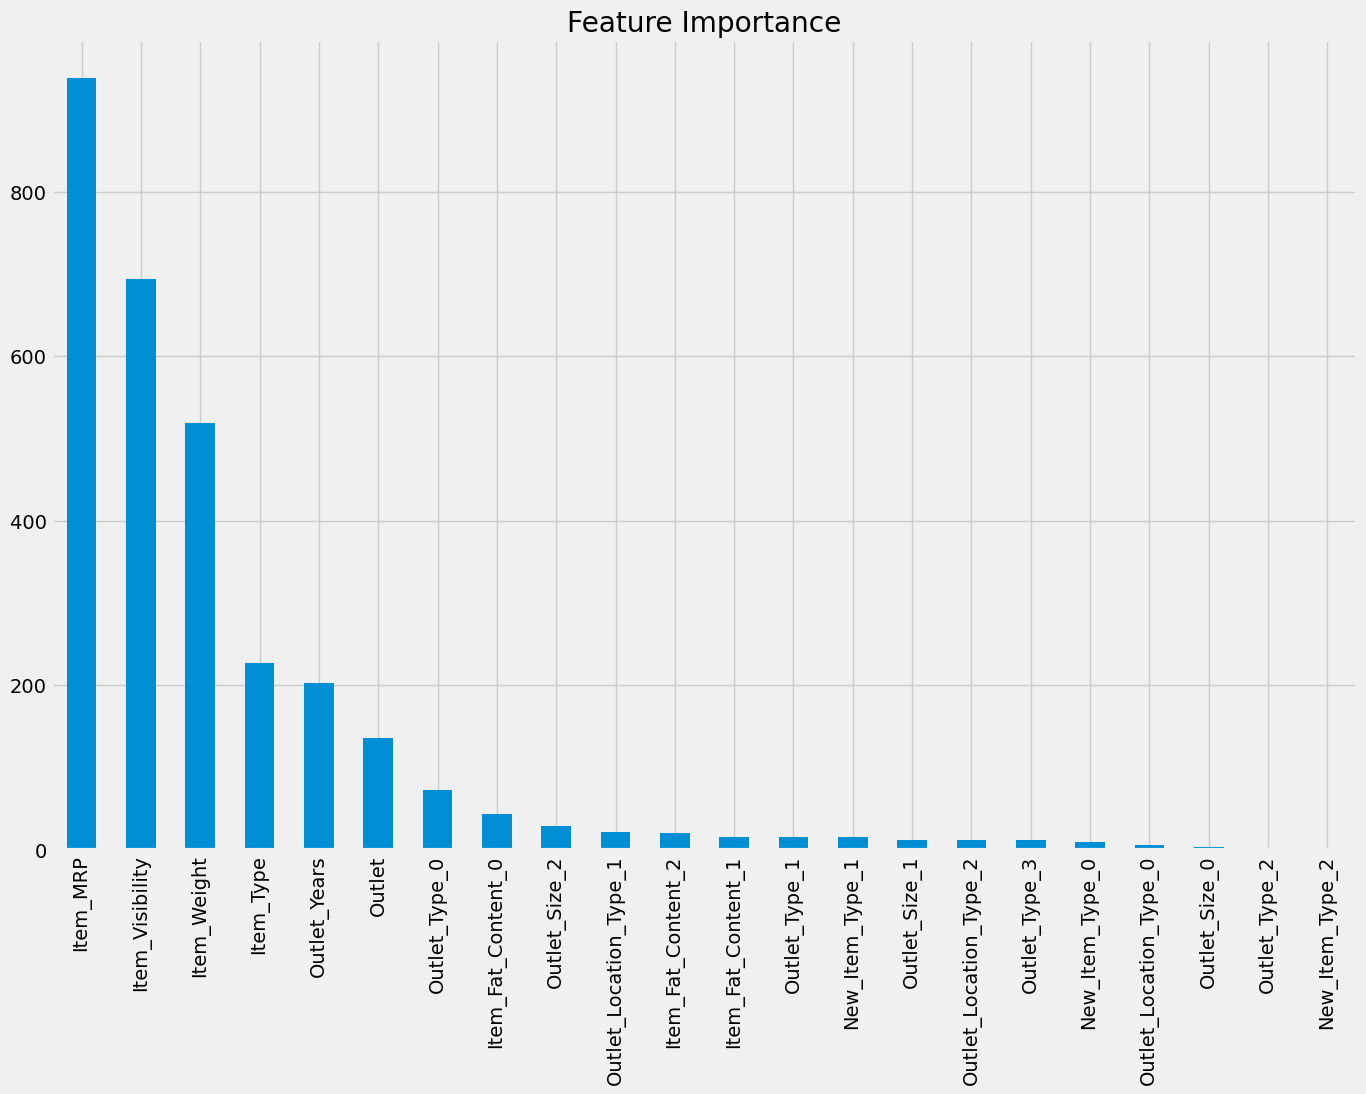

In [59]:
LG = LGBMRegressor()
FitModel(LG,x_train,y_train)

**_Fitting the <span style='color:violet'> Cat Boost Regressor </span> algorithm to the model and passing it to the defined function with train dependent and train independent variable and getting the output for the defined function_**

Model Report

Scoring - neg_mean_squared_error
[-1204342.95001023 -1258326.80109096 -1236189.83533822 -1305120.10336832
 -1133897.68095895 -1358844.46809349 -1125484.0315177  -1338789.18295122
 -1056983.85106778 -1321537.20330976]

Absolute Avg of - neg_mean_squared_error:  1233951.6107706637 


R2 Score
[0.57925591 0.56655709 0.59287863 0.59613596 0.64570059 0.5004972
 0.60820795 0.51779039 0.60931201 0.52490258]

Average of R2 Score: 0.5741238307892427

Accuracy for full data

R2 Score:  0.7748063677888094

Item_MRP                  33.566239
Outlet_Type_0             26.339746
Item_Visibility            8.351087
Outlet_Years               8.237281
Item_Weight                5.728424
Item_Type                  4.367005
Outlet_Type_3              3.642566
Outlet                     3.549344
Item_Fat_Content_0         0.722289
Item_Fat_Content_2         0.646115
Outlet_Size_1              0.626977
Outlet_Location_Type_2     0.597250
Outlet_Location_Type_1     0.553677
Outlet_Type_1    

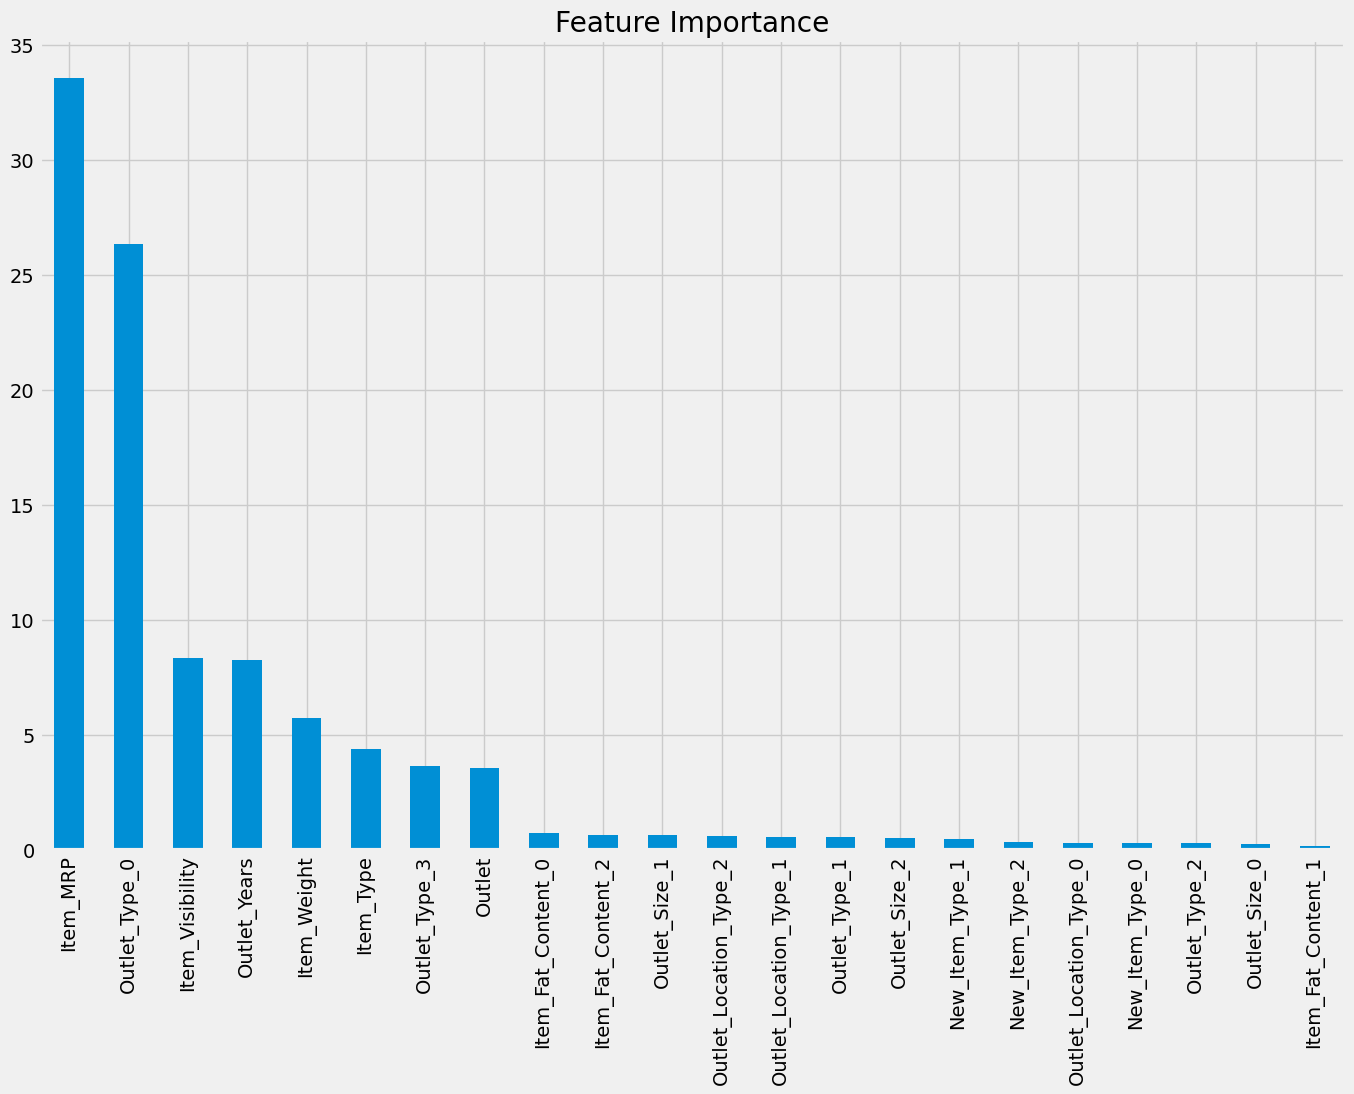

In [60]:
cat_boost = CatBoostRegressor(verbose=0)
FitModel(cat_boost,x_train,y_train)

**_Fitting the <span style='color:violet'> XGB Regressor </span> algorithm to the model and passing it to the defined function with train dependent and train independent variable and getting the output for the defined function_**

Model Report

Scoring - neg_mean_squared_error
[-1302021.34802141 -1347293.36539867 -1302574.5294862  -1423142.2751991
 -1253674.69436762 -1519804.3870573  -1233491.69882174 -1508361.77560653
 -1202318.65105563 -1470911.59818954]

Absolute Avg of - neg_mean_squared_error:  1356359.432320376 


R2 Score
[0.5451314  0.53591169 0.57101579 0.55961449 0.60827488 0.44132933
 0.57060942 0.45671316 0.55559259 0.47120195]

Average of R2 Score: 0.5315394686500091

Accuracy for full data

R2 Score:  0.8631529181826877

Outlet_Type_0             0.778216
Outlet_Years              0.040896
Item_MRP                  0.040286
New_Item_Type_1           0.013235
Outlet_Location_Type_1    0.011955
Outlet_Location_Type_0    0.011323
Outlet_Type_1             0.010315
Outlet_Location_Type_2    0.008641
Outlet_Type_3             0.008631
Outlet                    0.008441
Outlet_Size_0             0.008142
Item_Type                 0.007598
Outlet_Size_2             0.007414
Item_Fat_Content_1        0.007

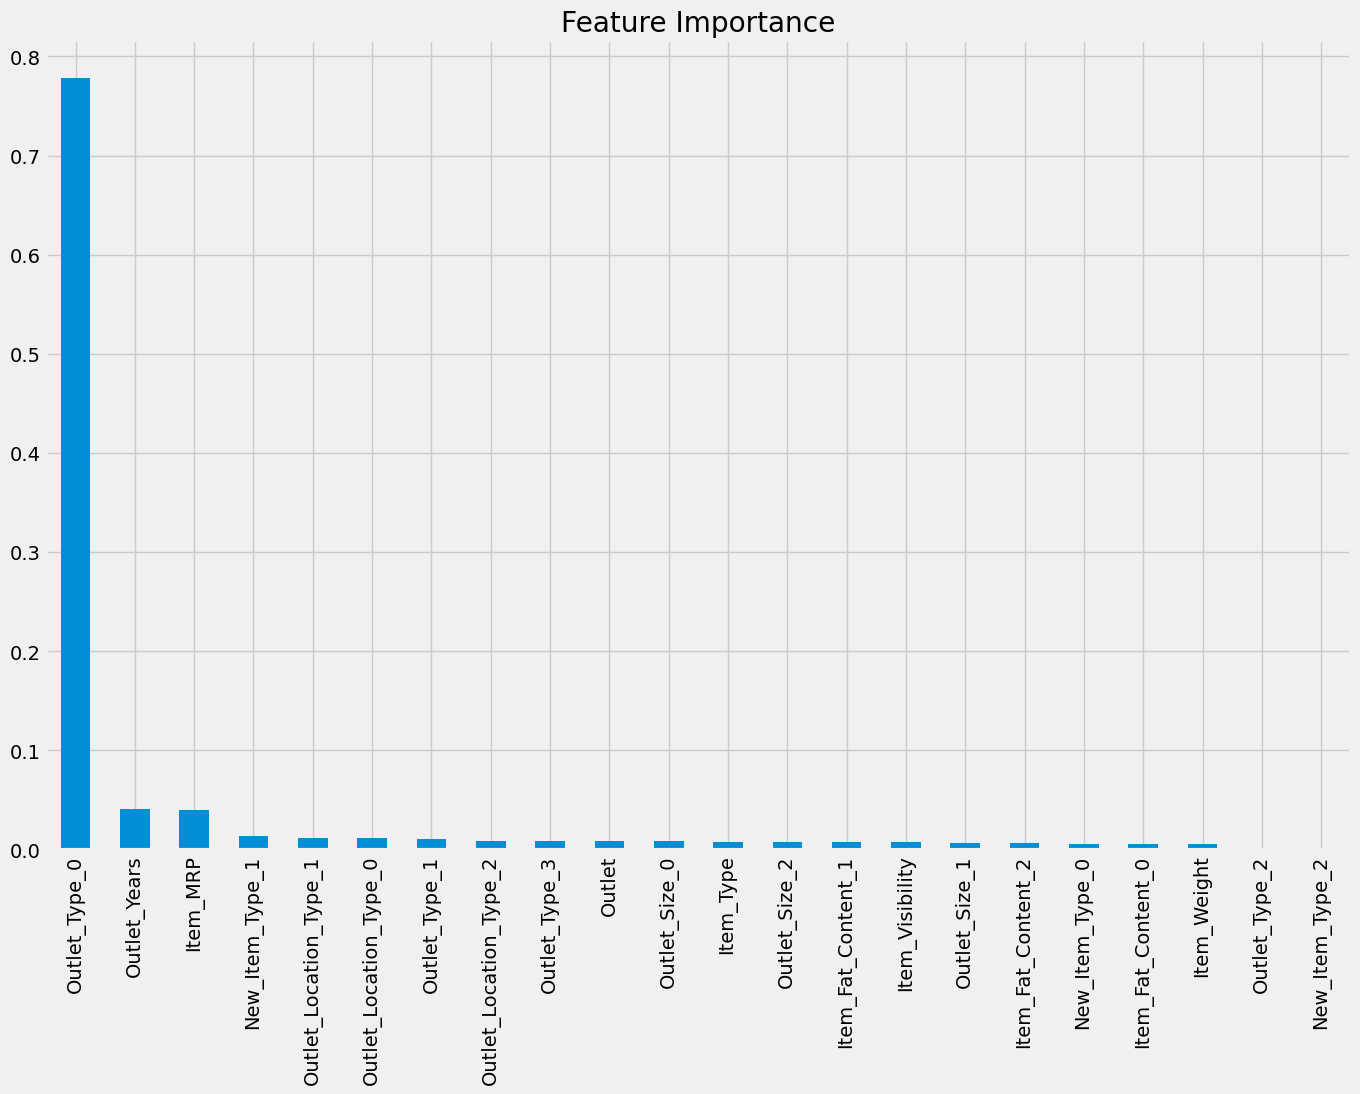

In [61]:
XG = XGBRegressor()
FitModel(XG,x_train,y_train)

**_Passing some of list parameter for the <span style='color:violet'>Random Forest Regressor </span> Model to run with Randomized Search CV Algorithm_**

In [62]:
random_grid  = {'max_features':['auto','sqrt'],
               'max_depth':[int(x) for x in np.linspace(5,30,num=6)],
               'min_samples_split':[2,5,10,15,100],
               'min_samples_leaf':[1,2,5,10]}

**_Fitting the <span style='color:violet'>Random Forest Regressor </span> model with the above mentioned parameter in the RandomizedSearchCV Algorithm and displaying the best parameters, best score and r2 score between test dependent variable and predicting dependent variable_**

In [63]:
RF = RandomForestRegressor()
RF = RandomizedSearchCV(estimator=RF,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,
                        verbose=0,cv=10,random_state=10,n_jobs= 1)
RF.fit(x_train,y_train)
print(' Best Params:',RF.best_params_)
print('\n Score:',RF.best_score_)
pred = RF.predict(x_test)
print('\n R2 Score :',r2_score(y_test,pred))

 Best Params: {'min_samples_split': 100, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20}

 Score: -1178745.8434511067

 R2 Score : 0.5883363197897513


**_Visualizing the data distribution of the dependent test variable and predicted dependent variable of the random forest regressor model against the density distribution using Seaborn Distplot_**

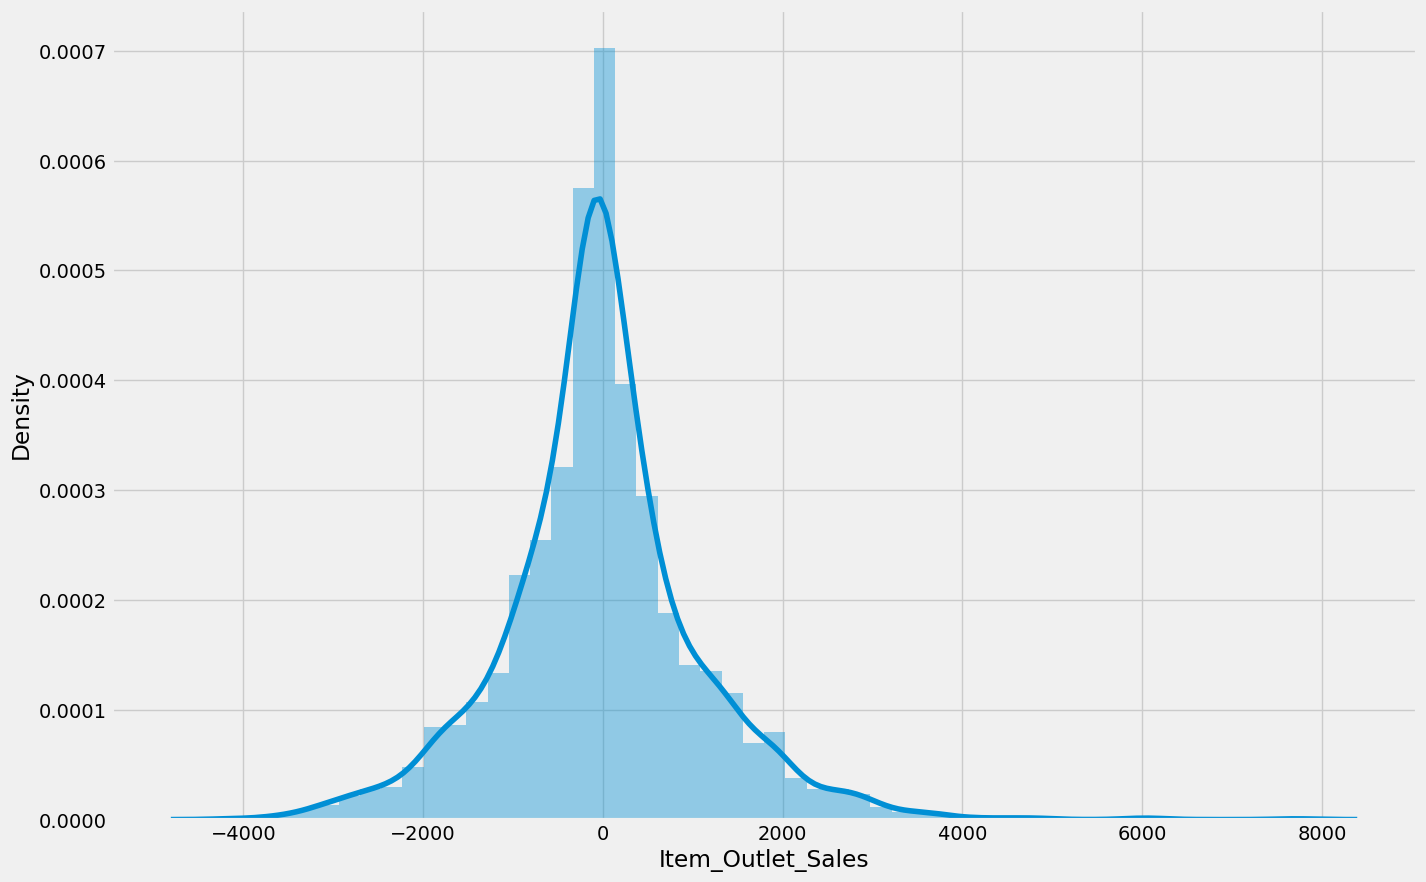

In [64]:
sns.distplot(y_test-pred)
plt.show()

**_Passing some of list parameter for the <span style='color:violet'>LGBM Regressor </span> Model to run with Randomized Search CV Algorithm_**

In [65]:
params = {'learning_rate':uniform(0.03,0.3),
          'max_depth':randint(2,6),
          'n_estimators':randint(100,150),
          'subsample':uniform(0.6,0.4)}

**_Fitting the <span style='color:violet'>LGBM Regressor </span> model with the above mentioned parameter in the RandomizedSearchCV Algorithm and displaying the best parameters, best score and r2 score between test dependent variable and predicting dependent variable_**

In [66]:
LGB = LGBMRegressor()
RF = RandomizedSearchCV(estimator=LGB,param_distributions=params,scoring='neg_mean_squared_error',verbose=0,
                        cv=10,n_iter=10,n_jobs=1)
RF.fit(x_train,y_train)
print(' Best Params:',RF.best_params_)
print('\n Score:',RF.best_score_)
pred = RF.predict(x_test)
print('\n R2 Score :',r2_score(y_test,pred))

 Best Params: {'learning_rate': 0.06245826432715047, 'max_depth': 2, 'n_estimators': 132, 'subsample': 0.7784678560720041}

 Score: -1160703.4911580556

 R2 Score : 0.5957937599446902


**_Visualizing the data distribution of the dependent test variable and predicted dependent variable of the LGBM regressor model against the density distribution using Seaborn Distplot_**

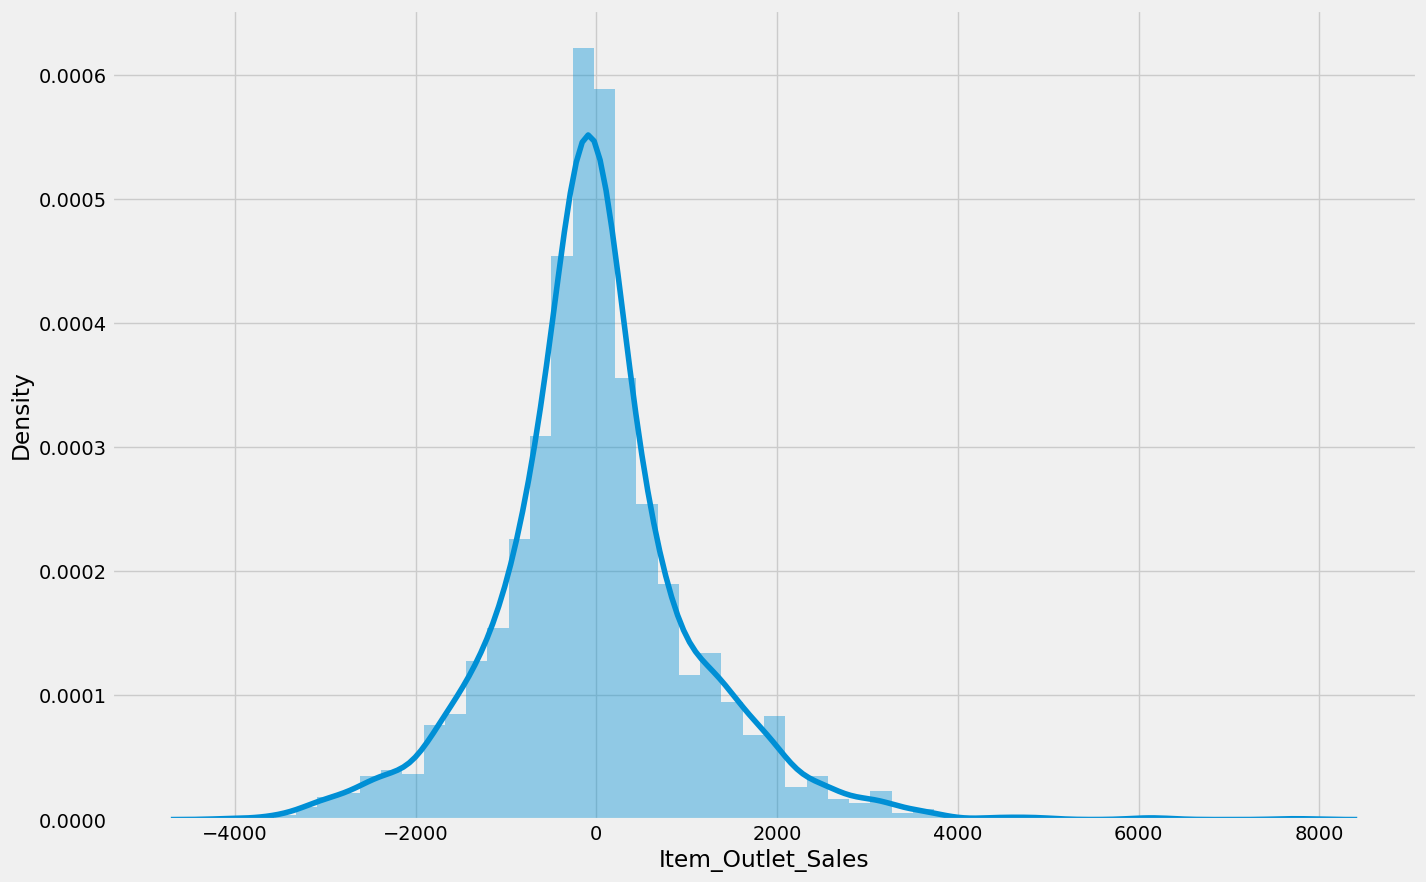

In [67]:
sns.distplot(y_test-pred)
plt.show()

**_Passing some of list parameter for the <span style='color:violet'>XGB Regressor </span> Model to run with Randomized Search CV Algorithm_**

In [68]:
params = {'gamma':uniform(0,5),
          'learning_rate':uniform(0.03,0.3),
          'max_depth':randint(2,6),
          'n_estimators':randint(100,150),
          'subsample':uniform(0.6,0.4)}

**_Fitting the <span style='color:violet'>XGB Regressor </span> model with the above mentioned parameter in the RandomizedSearchCV Algorithm and displaying the best parameters, best score and r2 score between test dependent variable and predicting dependent variable_**

In [69]:
XGB = XGBRegressor()
RF = RandomizedSearchCV(estimator=XGB,param_distributions=params,scoring='neg_mean_squared_error',verbose=0,
                        cv=10,n_iter=10,n_jobs=1)
RF.fit(x_train,y_train)
print(' Best Params:',RF.best_params_)
print('\n Score:',RF.best_score_)
pred = RF.predict(x_test)
print('\n R2 Score :',r2_score(y_test,pred))

 Best Params: {'gamma': 4.888648199792312, 'learning_rate': 0.06352819266445964, 'max_depth': 2, 'n_estimators': 106, 'subsample': 0.6055822330120152}

 Score: -1167235.3719894756

 R2 Score : 0.5973418409662763


**_Visualizing the data distribution of the dependent test variable and predicted dependent variable of the XGB regressor model against the density distribution using Seaborn Distplot_**

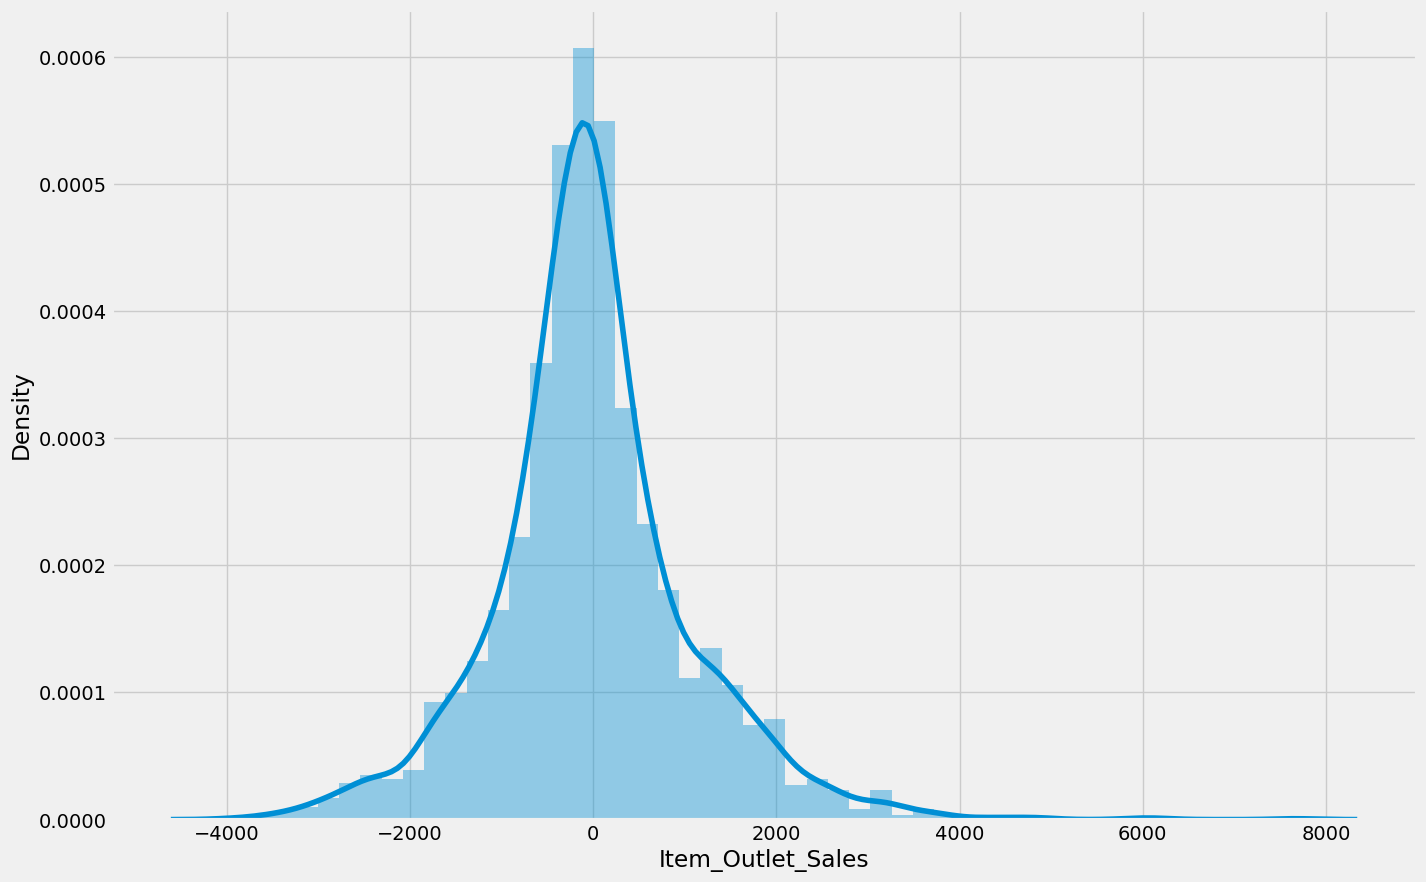

In [70]:
sns.distplot(y_test-pred)
plt.show()

**_Passing some of list parameter for the <span style='color:violet'>Cat Boost Regressor </span> Model to run with Randomized Search CV Algorithm_**

In [71]:
params = {'learning_rate':uniform(0.03,0.3),
          'max_depth':randint(2,6),
          'n_estimators':randint(100,150),
          'subsample':uniform(0.6,0.4)}

**_Fitting the <span style='color:violet'>Cat Boost Regressor </span> model with the above mentioned parameter in the RandomizedSearchCV Algorithm and displaying the best parameters, best score and r2 score between test dependent variable and predicting dependent variable_**

In [72]:
Cat_Boost = CatBoostRegressor(verbose=0)
RF = RandomizedSearchCV(estimator=Cat_Boost,param_distributions=params,scoring='neg_mean_squared_error',verbose=0,
                        cv=10,n_iter=10,n_jobs=1)
RF.fit(x_train,y_train)
print(' Best Params:',RF.best_params_)
print('\n Score:',RF.best_score_)
pred = RF.predict(x_test)
print('\n R2 Score :',r2_score(y_test,pred))

 Best Params: {'learning_rate': 0.10907173795829213, 'max_depth': 4, 'n_estimators': 133, 'subsample': 0.6523791860191523}

 Score: -1161102.599141276

 R2 Score : 0.5930445084593


**_Visualizing the data distribution of the dependent test variable and predicted dependent variable of the Cat Boost regressor model against the density distribution using Seaborn Distplot_**

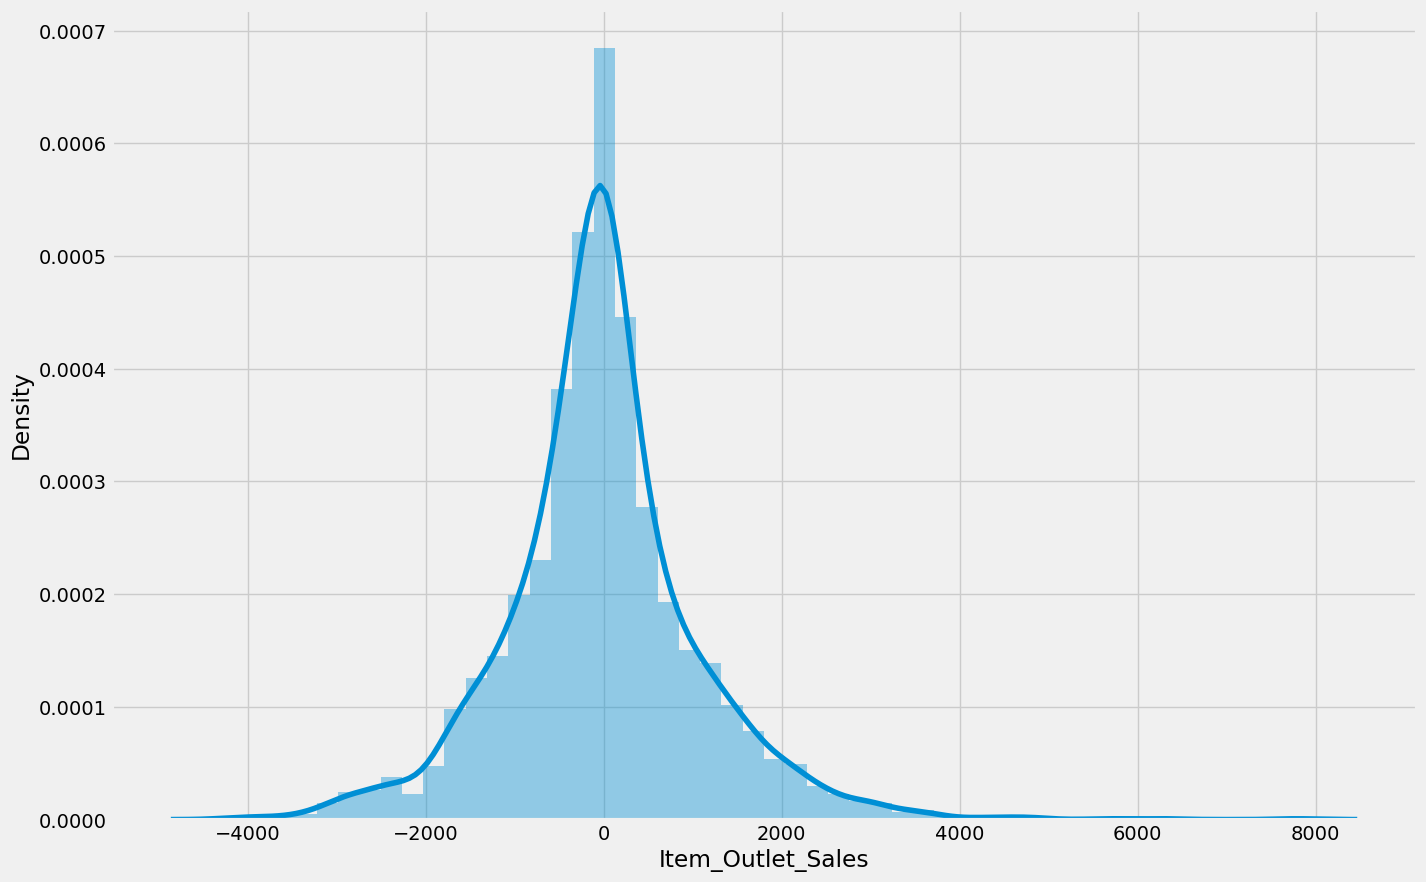

In [73]:
sns.distplot(y_test-pred)
plt.show()

**_Fitting the <span style='color:violet'>XGB Regressor </span> Model with the best params got from the Randomized SearchCV and predicting the test dependent data to verify the r2 score with the r2 score got from the Randomized SearchCV_**

In [74]:
XGB = XGBRegressor(gamma = 2.2187417596850523, learning_rate = 0.0451611516302824,
                   max_depth = 2, n_estimators = 116, subsample = 0.7550948277670457)
XGB.fit(x_train,y_train)
y_pred = XGB.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))

R2 Score : 0.596196933139707


## _Model Testing_
**_Loading the pickle file with the algorithm which gives highest accuracy score_**

In [75]:
pickle.dump(XGB,open('Model.pkl','wb'))

**_Loading the pickle file and predicting the dependent variable for the whole data and getting the r2 score between the predicted dependent variable and dependent variable._**

In [76]:
model = pickle.load(open('Model.pkl','rb'))
pred = model.predict(x)
print('R2 Score for full data :{}%'.format(100*r2_score(y,pred)))

R2 Score for full data :60.53342463328855%
